# Treasure Hunters Inc.

    We do the treasure hunting and monster fighting for you
> 1. Set up a new git repository in your GitHub account
> 2. Think up a map-like environment with treasure, obstacles and opponents
> 3. Choose a programming language (Python, C/C++, Java)
> 4. Formulate ideas on how reinforcement learning can be used to find treasure efficiently while avoiding obstacles and opponents
> 5. Build one or more reinforcement policies to model situational assessments, actions and rewards programmatically
> 6. Document your process and results
> 7. Commit your source code, documentation and other supporting files to the git repository in GitHub

In [1]:
from IPython.display import IFrame
#IFrame('https://en.wikipedia.org/wiki/Tic-tac-toe', width=700, height=350)

# A game of X and O
#### For this project, I thought of the game of X and Os to model my treasure environment after. I had once built a 1 player game of Xs and Os as my 10th grade (Sophomore Year High School) project in JAVA (Object Oriented): 
#### I remember having to play the game over and over, come up with policies for winning and having to hardcode those in with if statements, loops and what not!<br>I kept telling myself then that there had to be a better way for doing this!
### Lets Start by designing the map (or) the board (or) the game environment$     _{In Python}$

    > 1. The Board which is initially empty but can take the 'X' and 'O' markers from players - a 2d array 
    > 2. show() function to see it
    > 3. Rules for deciding when the game is over and to determine if there is a Winner:
        > a. got 3 in left Diag
        > b. got 3 in right Diag
        > c. any of the row matches
        > d. any of the column matches
        > e. Out of moves
    > 4. Make move Function

In [2]:
%time

# pip install tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

class GameBoard(object):
    def __init__(self, Current='x'):
        self.board = np.zeros((3, 3)).astype(int)
        self.over = False
        self.winner = None
        self.markX = {'Symbol': 'X','value': 2}
        self.mark0 = {'Symbol': 'O','value': 1}
        self.Vacant = {'Symbol': ' ','value': 0}
        if Current.lower() == 'x':
            self.Current, self.Opponent = (self.markX, self.mark0)
        else:
            self.Current, self.Opponent =(self.mark0, self.markX)
        
    def whatIS(self, val):
        if val == self.markX.get('value'):
            return self.markX.get('Symbol')
        elif val == self.mark0.get('value'):
            return self.mark0.get('Symbol')
        else:
            return self.Vacant.get('Symbol')

    def show(self):
        vals = []
        for i in range(3*3):
            vals.append(self.whatIS(self.board.item(i)) )
       
        board = "|-----------|\n| {} | {} | {} |\n|-----------|\n| {} | {} | {} |\n|-----------|\n| {} | {} | {} |\n|-----------|".format(*vals)
        
        print(board)
        
    def areEqual(self, axis, val, x, y):
        result = True
        i = j = 0
        if axis == 0:
            pos, loc, ignore_id = (j, x, y)
        else:
            pos, loc, ignore_id =(i, y, x)
        while pos < 3:
            if pos != ignore_id:
                if axis == 0:
                    board_val = self.board[loc][pos]
                else:
                    board_val = self.board[pos][loc]
                if board_val != val or board_val == 0: # Vacant spot is present
                    result = False
                    break
            pos += 1
        return result
    
    def checkLeftDiag(self, val, x):
        i = j = 0
        result = True
        while i < 3:
            if i != x:
                if self.board[i][j] != val or self.board[i][j] == 0:
                    result = False
                    break
            i += 1
            j += 1
        return result

    def checkRightDiag(self, val, x):
        result = True
        i = 0
        j = 3 - 1
        while i < 3:
            if i != x:
                if self.board[i][j] != val or self.board[i][j] == 0:
                    result = False
                    break
            i += 1
            j -= 1
        return result

    def checkColumn(self, val, x, y):
        return self.areEqual(1, val, x, y)

    def checkRow(self, val, x, y):
        return self.areEqual(0, val, x, y)
    
    def check_diagnols(self, val, x, y):
        if x == y and x + y == 3 - 1:
            return self.checkLeftDiag(val, x) or self.checkRightDiag(val, x)
        if x == y:
            return self.checkRightDiag(val, x)
        if x + y == 3 - 1:
            return self.checkRightDiag(val, x)
        return False
    
    def gameOver(self, player, val, x, y):
        game_state = self.checkColumn(val, x, y) or self.checkRow(val, x, y) or self.check_diagnols(val, x, y)
        return game_state
    
    def draw(self):
        x, y = np.where(self.board == 0)
        if len(x) == 0 and len(y) == 0:
            self.over = True
        return self.over

    def make_move(self, mark, x, y):
        symbol = None
        if mark == self.mark0.get('Symbol'):
            symbol = self.mark0
        elif mark == self.markX.get('Symbol'):
            symbol = self.markX
        else:
            # invalid symbol
            raise Exception('spam', 'eggs')
            return
        if self.board[x][y] == 0:
            self.board[x][y] = symbol.get('value')
            self.show()
            if self.gameOver(symbol.get('Symbol'), symbol.get('value'), x, y):
                self.winner = symbol.get('Symbol')
                print('Winner is: '+str(self.winner))
                return self.winner
            elif self.draw():
                print('Draw')
                return 'draw'
            
    def play_1(self, x, y):
        if x > 2 or y > 2:
            raise Exception('Invalid', self.Current.get('Symbol'))
        self.make_move(self.Current.get('Symbol'), x, y)
        
    def play_2(self, x, y):
        if x > 2 or y > 2:
            Exception('Invalid', self.Current.get('Symbol'))
        self.make_move(self.Opponent.get('Symbol'), x, y)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [3]:
game = GameBoard()
game.play_1(2,2)
game.play_2(1,0)
game.play_1(0,0)

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|


# Reinforcement Learning
 ----
 
### Now that we have an environment defined where we can play the game; Let's bring in Reinforcement Learning agents to become really good at it!
### https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ
Amazing resource on Reinforcement Learning and Bellman Equations [David Silver, Google DeepMind]   

## Quick Terminology:
### > Environment --> which we just defined as the GameBoard.
### > Action --> Selecting a box to place a marker in.
### > Policy --> The Action Selection Neural Network (with weights and Biases to determine what action to take GIVEN current state)
### > States --> Possible Snapshots of the environment - the situations the agent can be in. 
### > State-Value --> Every state has an associated Value. This is a measure of how desirable it is to be in that state.
### > Reward --> reinforcement provided for the action taken

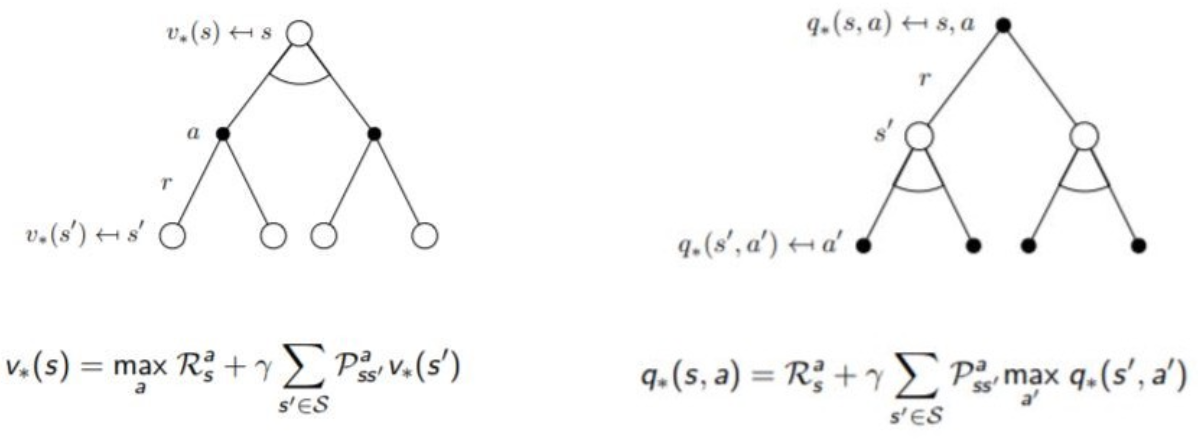

### Lets take a look at the math hapenning :
    > Lets suppose we are starting from an intermediate initial state S {Value = V}
    
    > We choose an action 'a' from our available actions (moves in X and O), which we convey to the environment.
    
    > The environment processes the action, its recursive results, etc. and transitions us (the agent) into another state S' {Value = V'} {S=S'possible} {but not in X and O, since there is no undo}
    
    > The difference V' - V can be seen as a reward or a punishment depending on:
        > IF V > V' [We took a BAD action - Our current position is not as desirable as the previous one]
        > ELSE V' > V [We took a GOOD action - Our current position is better than it was before]
        > IF they are equal then there was no progress made in that move. {This becomes relevant for time sensitive models - where the reward can be -1 for every extra time step in the virtual world (Environment)
        
    > Now we need to make ammends for that action. Since we were in an intermediate state S, we can now change the value of that to represent the transition from S to S' as GOOD or BAD. 
    
    > Since all such states - S are intermediate states, we can follow a process similar to back propogation, to recursively ammend the values of all our S -> S' mappings. 
    
    > We will also have a step size dampner which reduces the effect of the later state actions of the earlier states depending on how severly they affected the final Value.
    
    > This is all similar to some other ML approaches, but Reinforcement Learning is different because it utilizes a probablity distribution to select actions and randomly samples from there - makes mistakes, wins, etc, but in the end comes up with better and better policies to select actions.
    
    > Since the model is coming up with better and better ways to play the game, it may get stuck with one approach since there may be victory down that road eventially - but this could also be a Local minimum. To deal with this, an Epsilon Greedy approach is implemented. This helps determine if the agent should exploit the policies it already has, or should it explore and build more policies, possibly better one!
    
    > Epsilon greedy policy is a way of selecting random actions with uniform distribution from a set of available actions. It is as simple as selecting directions, which gives:
    a> expliot - maximum reward with (1-e) probability and
    b> explore - with e probability it select random direction.
    
    > We will let 2 such agents play against eachother for a certain number of games and see how the their policies change over time.


In [4]:
class Agent(object):
    def __init__(self, smart = False):
        self.states = {}
        self.actionsTaken = []
        self.lrl = 0.5
        self.discount = 0.01
        if smart:
            self.Epsilon = 0
        else:
            self.Epsilon = 0.2
    
    def UpdateAgentPolicy(self, reward, S1, S0):
        current = self.states.get(S0, np.zeros((3,3)))
        return self.lrl * ((reward * self.states[S1]) - current)

    def takeAction(self, current, action):
        S0 = ""
        temp = current.flatten()
        for i in temp.flatten().tolist():
            S0 = S0 + str(i)
        self.actionsTaken.append((S0, action))

    def backPropogate(self, reward):
        
        if len(self.actionsTaken) == 0:
            return None

        S1, acted = self.actionsTaken.pop()
        self.states[S1] = np.zeros((3,3))
        self.states[S1].itemset(acted, reward)
        while self.actionsTaken:
            S0, action = self.actionsTaken.pop()
            reward *= self.discount
            if S0 in self.states:
                reward += self.UpdateAgentPolicy(reward, S1, S0).item(acted)
                self.states[S0].itemset(action, reward)
            else:
                self.states[S0] = np.zeros((3,3))
                reward = self.UpdateAgentPolicy(reward, S1, S0).item(acted)
                self.states[S0].itemset(action, reward)          
            S1 = S0
            acted = action
            
    def play(self, board):
        S0 = ""
        temp = board.flatten()
        for i in temp.flatten().tolist():
            S0 = S0 + str(i)
        exploration = np.random.random() < self.Epsilon
        
        if exploration or S0 not in self.states:
            action = self.explore(board)
        else:
            action = self.exploit(S0)

        self.takeAction(board, action)
        return action

    def explore(self, board):
        print("Exploring")
        xs, ys = np.where(board == 0)
        vacant = [(x, y) for x, y in zip(xs, ys)]
        rand = np.random.choice(len(vacant))
        return vacant[rand]
        
    def exploit(self, S0):
        state_values = self.states[S0]
        print("Exploiting")
        print('State-Values')
        print(state_values)
        heatmap = plt.imshow(state_values, cmap="gray")
        print(heatmap)
        plt.show()
        bestAct = state_values.max()
        best_Ax, best_Ay = np.where(state_values == bestAct)
        
        best = [(x, y) for x,y in zip(best_Ax, best_Ay)]
        rand = np.random.choice(len(best))
        return best[rand]
    
def endGame(game, p1, p2):
    if game.winner == 'X':
        p1.backPropogate(1)
        p2.backPropogate(-1)
    elif game.winner == 'O':
        p1.backPropogate(-1)
        p2.backPropogate(1)
    
def train(n_games, p1, p2):

    Players = [{'self': p1, 'name': 'AIPlayer 1', 'sym': 'X'},
            {'self': p2, 'name': 'AIPlayer 2', 'sym': 'O'}]

    Winners = pd.DataFrame(columns=['AIPlayer 1', 'AIPlayer 2'])

    for i in tqdm(range(n_games)):
        print("\n\n")
        print('Game: '+ str(i + 1))
        game = GameBoard()
        while not game.over and not game.winner:
            for P in Players:
                winner = game.make_move(P['sym'], *P['self'].play(game.board))
                if winner:
                    # Make ammends for rewards
                    print(winner + " has won the game")
                    endGame(game, p1, p2)
                    Winners.at[i, P['name']] = 1
                    break
                elif winner == 'draw':
                    for pla in Players:
                        Winners.at[i, pla['name']] = 0
                    break
    return Winners

%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs



Game: 1
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X | O | X |
|-----------|
| O |   | X |
|-----------|
Winner is: X
X has won the game



Game: 2
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000

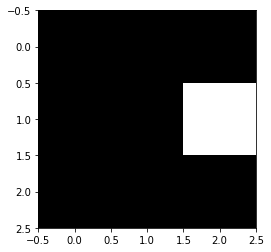

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


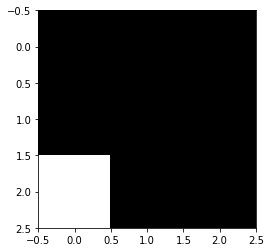

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


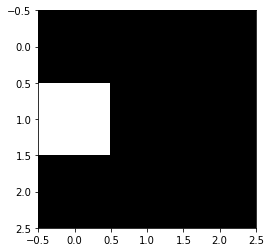

|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


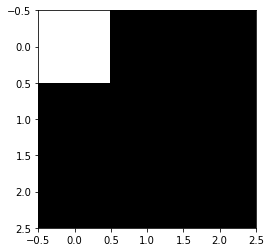

|-----------|
| O |   |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


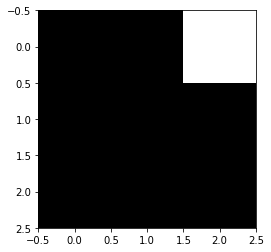

|-----------|
| O |   | X |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


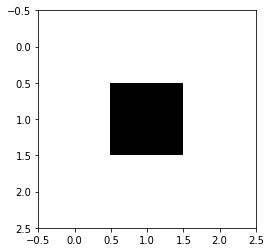

  2%|▏         | 2/100 [00:00<00:48,  2.01it/s]

|-----------|
| O |   | X |
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | X |
|-----------|
| O |   | O |
|-----------|
Winner is: O
O has won the game



Game: 3
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


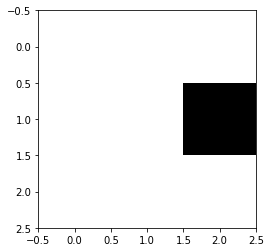

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|

  3%|▎         | 3/100 [00:01<00:39,  2.45it/s]


Exploring
|-----------|
| X | O |   |
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
Winner is: X
X has won the game



Game: 4
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X 

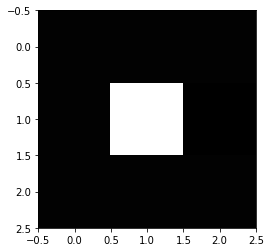

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


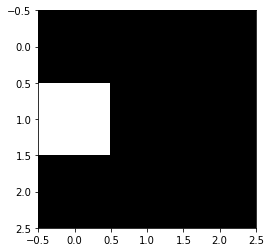

|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(54,36;334.8x217.44)


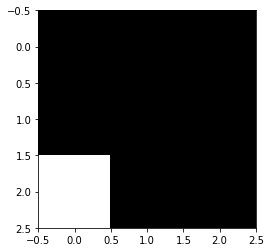

|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


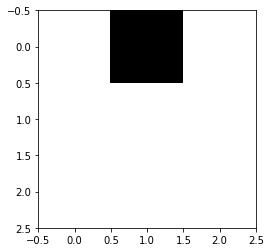

  5%|▌         | 5/100 [00:01<00:33,  2.87it/s]

Exploring
|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O | X |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | X |   |
|-----------|
| X | X |   |
|-----------|
Winner is: X
X has won the game



Game: 6
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09  5.01262563e-07 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


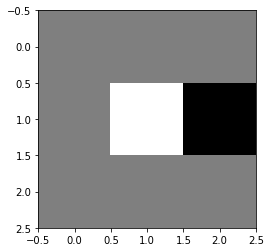

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
|   | X | O |
|-----------|
Winner is: O
O has won the game



Game: 7
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09  5.01250000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


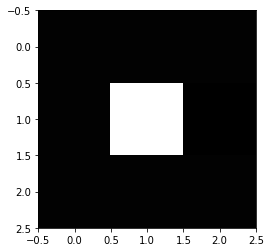

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  5.0125e-05]]
AxesImage(54,36;334.8x217.44)


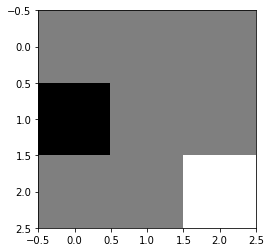

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(54,36;334.8x217.44)


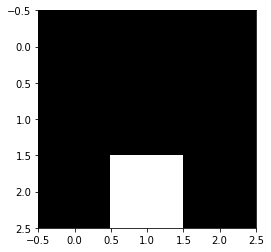

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


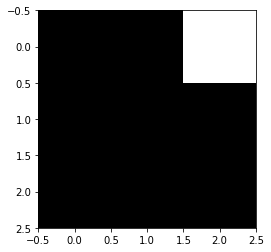

|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


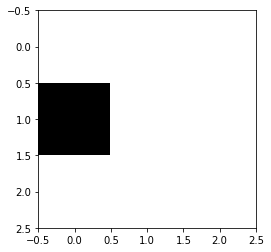

  7%|▋         | 7/100 [00:02<00:30,  3.03it/s]

Exploring
|-----------|
|   |   | O |
|-----------|
|   | X | O |
|-----------|
|   | X | O |
|-----------|
Winner is: O
O has won the game



Game: 8
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


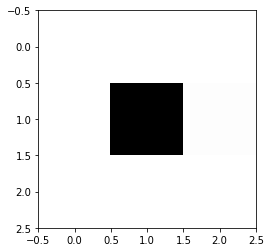

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


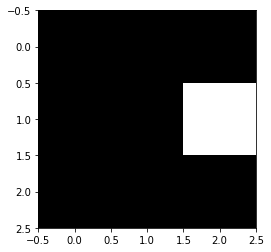

|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(54,36;334.8x217.44)


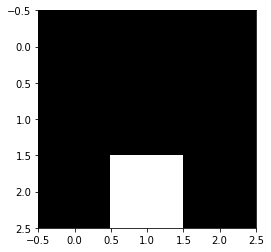

  8%|▊         | 8/100 [00:02<00:32,  2.82it/s]

|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 9
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.01262688e-09 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


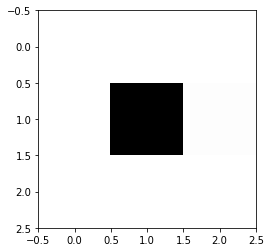

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
| X |   | X |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 10
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.987500

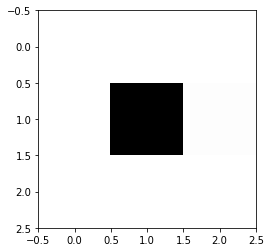

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.01262563e-07]
 [0.00000000e+00 0.00000000e+00 1.25000008e-09]]
AxesImage(54,36;334.8x217.44)


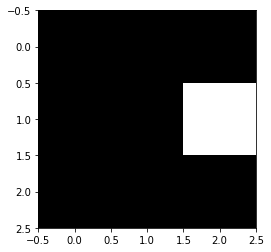

|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 5.01262563e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


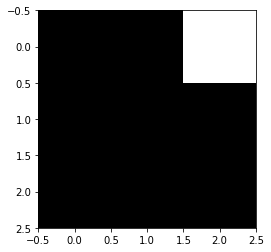

|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.0125e-05 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


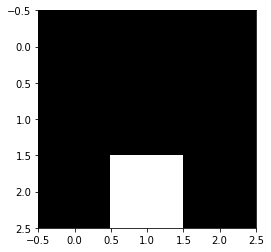

|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[5.0125e-05 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 5.0000e-03]]
AxesImage(54,36;334.8x217.44)


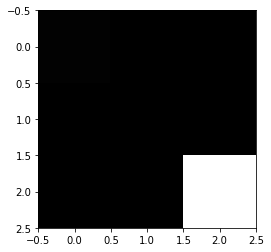

|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


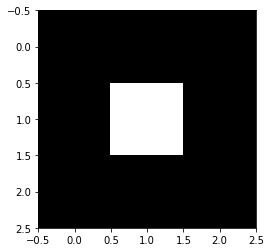

|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


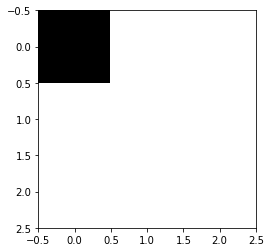

 10%|█         | 10/100 [00:03<00:34,  2.63it/s]

Exploring
|-----------|
| O |   | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
Draw
draw has won the game



Game: 11
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


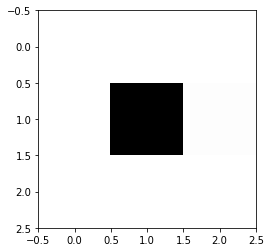

 11%|█         | 11/100 [00:03<00:26,  3.36it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Gam

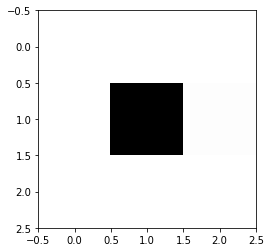

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 7.8125e-17 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


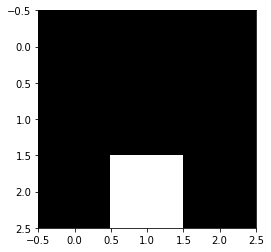

 13%|█▎        | 13/100 [00:03<00:21,  4.08it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   | O |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 14
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-47 -4.987500

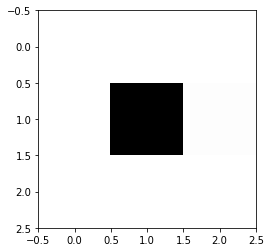

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25000008e-09 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


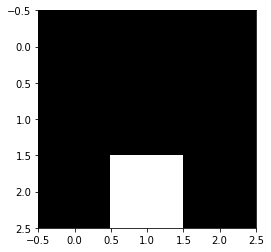

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[7.81250000e-17 1.25000008e-09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


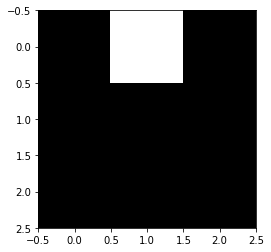

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


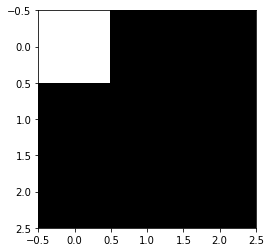

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


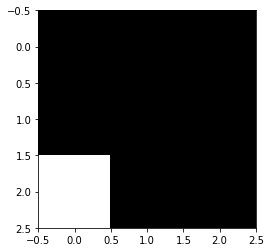

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


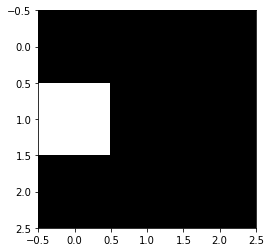

|-----------|
| O | X |   |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


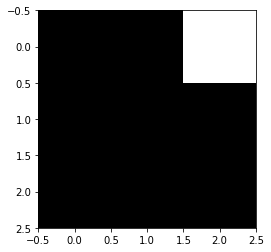

|-----------|
| O | X | X |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


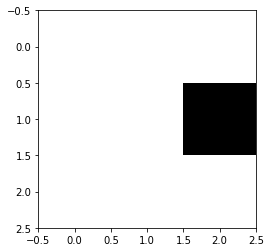

 14%|█▍        | 14/100 [00:04<00:39,  2.18it/s]

Exploring
|-----------|
| O | X | X |
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 15
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-47 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  1.51136534e-08]]
AxesImage(54,36;334.8x217.44)


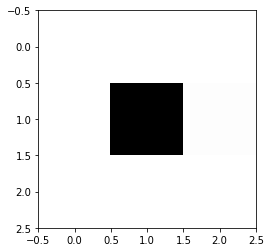

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


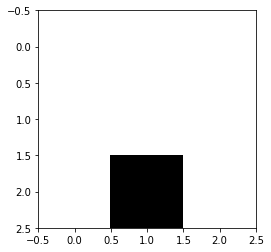

 15%|█▌        | 15/100 [00:04<00:32,  2.64it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O | X |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| O | X |   |
|-----------|
| O |   | X |
|-----------|
Winner is: O
O has won the game



Game: 16
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-47 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00  5.01250000e-05]]
AxesImage(54,36;334.8x217.44)


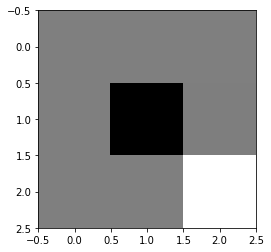

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


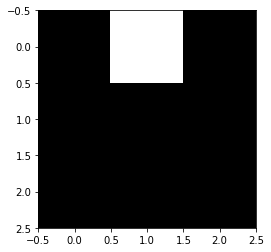

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


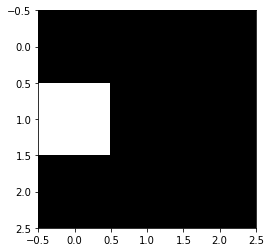

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O | X |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
AxesImage(54,36;334.8x217.44)


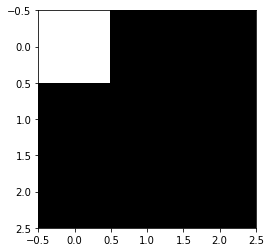

 16%|█▌        | 16/100 [00:05<00:36,  2.33it/s]

|-----------|
| O | X |   |
|-----------|
| O | X |   |
|-----------|
| O |   | X |
|-----------|
Winner is: O
O has won the game



Game: 17
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-47 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


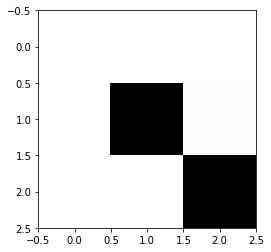

 17%|█▋        | 17/100 [00:05<00:27,  2.97it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | X |   |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | X | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Gam

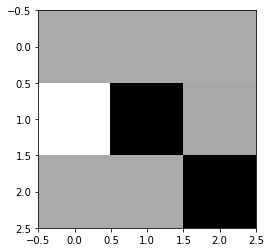

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.05175858e-49]
 [1.25000008e-09 1.25000008e-09 1.25000008e-09]]
AxesImage(54,36;334.8x217.44)


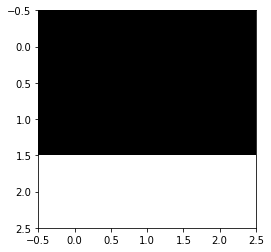

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]]
AxesImage(54,36;334.8x217.44)


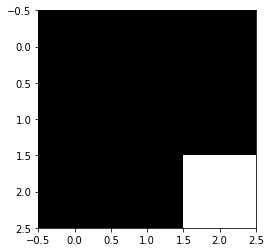

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


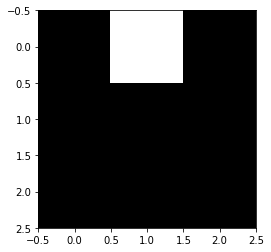

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(54,36;334.8x217.44)


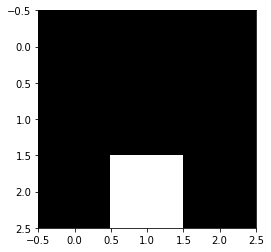

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


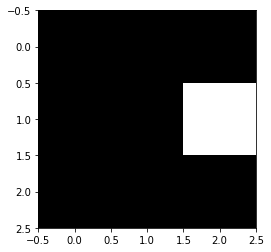

|-----------|
|   | O |   |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


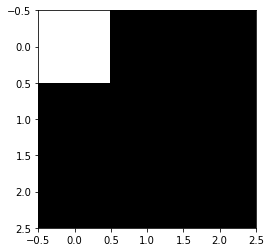

|-----------|
| X | O |   |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


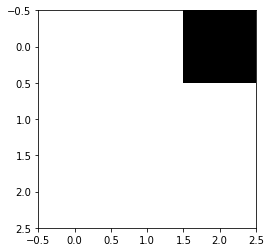

 18%|█▊        | 18/100 [00:06<00:43,  1.90it/s]

Exploring
|-----------|
| X | O |   |
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 19
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   | O | O |
|-----------|
| X | X | O 

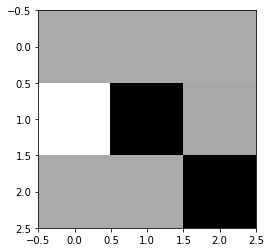

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.05175858e-49]
 [-4.98737562e-07  1.25000008e-09  1.25000008e-09]]
AxesImage(54,36;334.8x217.44)


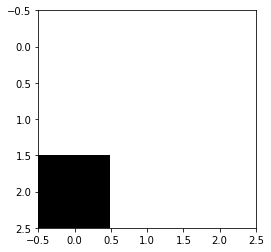

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


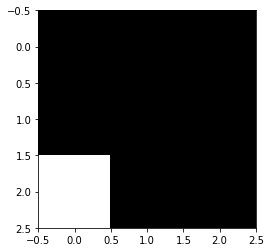

 20%|██        | 20/100 [00:07<00:34,  2.33it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 21
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  7.81250000e-19]
 [ 2.49526137e-05 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


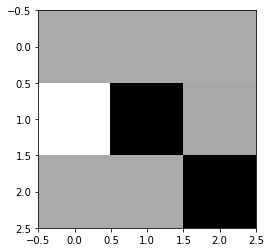

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.05175858e-49]
 [-4.98737562e-07  1.25000008e-09  1.25000008e-09]]
AxesImage(54,36;334.8x217.44)


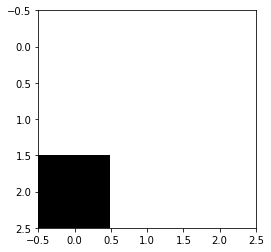

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


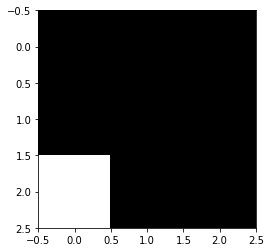

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


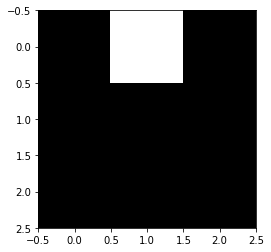

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


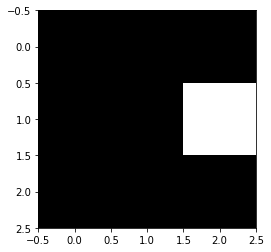

|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


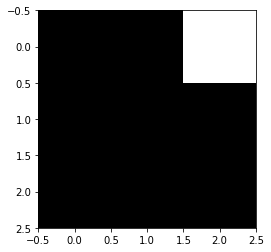

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
AxesImage(54,36;334.8x217.44)


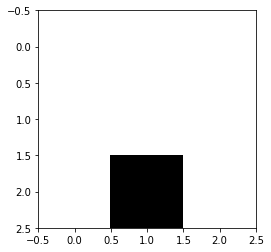

 21%|██        | 21/100 [00:07<00:40,  1.93it/s]

Exploring
|-----------|
|   | O | O |
|-----------|
| X | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 22
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  7.81250000e-19]
 [ 2.63881776e-72 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


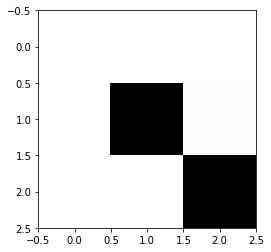

|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


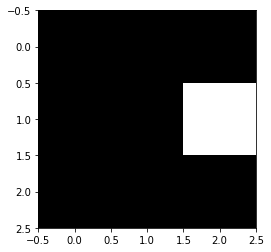

 22%|██▏       | 22/100 [00:07<00:32,  2.38it/s]

|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | O | O |
|-----------|
| X |   | X |
|-----------|
Winner is: O
O has won the game



Game: 23
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  5.01262563e-07]
 [ 2.63881776e-72 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


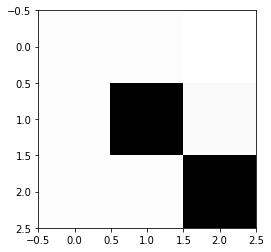

|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.25000008e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


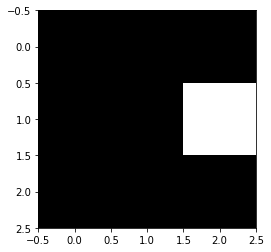

|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [5.0125e-05 7.8125e-17 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


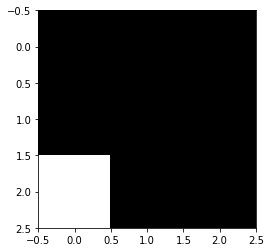

|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


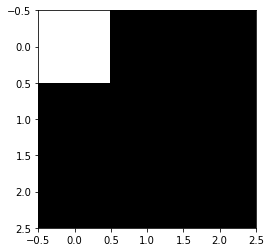

 23%|██▎       | 23/100 [00:08<00:33,  2.27it/s]

|-----------|
| O |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | X | O |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 24
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  5.01262688e-09]
 [ 2.63881776e-72 -4.98750000e-05 -4.98737562e-07]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


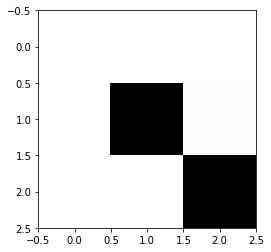

|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.01262563e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


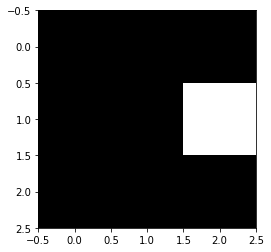

 24%|██▍       | 24/100 [00:08<00:28,  2.63it/s]

|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| O |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
| X |   |   |
|-----------|
Winner is: X
X has won the game



Game: 25
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-------

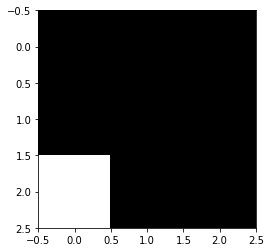

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(54,36;334.8x217.44)


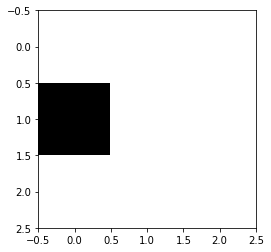

 26%|██▌       | 26/100 [00:08<00:22,  3.34it/s]

Exploring
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
Winner is: O
O has won the game



Game: 27
Exploiting
State-Values
[[ 5.01250000e-05  0.00000000e+00  5.01262563e-07]
 [ 2.63881776e-72 -4.98750000e-05  1.00002195e-06]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


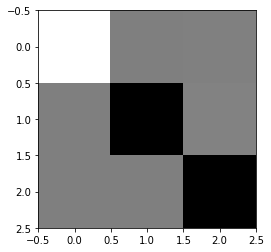

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


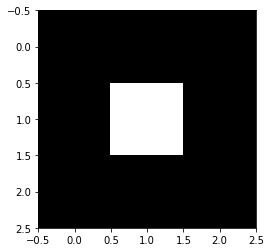

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


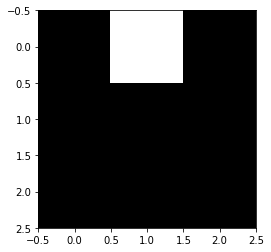

|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(54,36;334.8x217.44)


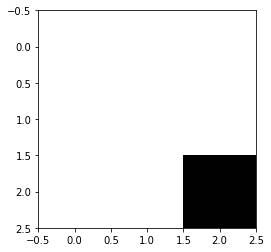

 27%|██▋       | 27/100 [00:09<00:25,  2.88it/s]

|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 28
Exploiting
State-Values
[[ 5.01250000e-05  0.00000000e+00  5.01262563e-07]
 [ 2.63881776e-72 -4.98750000e-05  1.00002195e-06]
 [ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


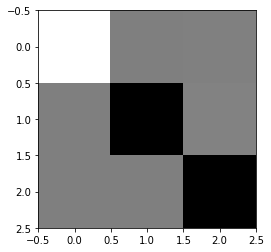

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


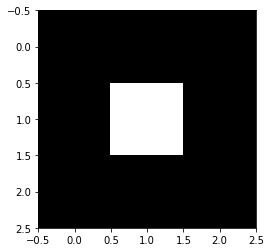

 28%|██▊       | 28/100 [00:09<00:23,  3.06it/s]

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 29
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|

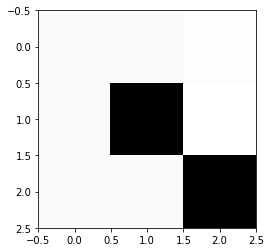

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.25000008e-09 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


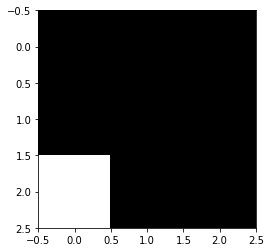

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-4.98750e-05  0.00000e+00  7.50625e-05]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]]
AxesImage(54,36;334.8x217.44)


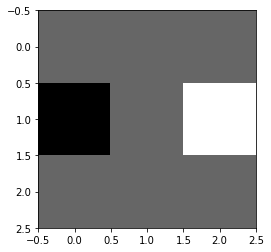

Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


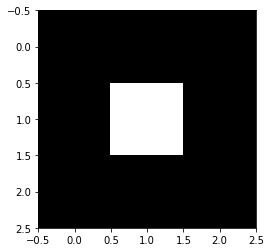

|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


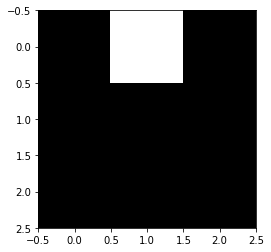

|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(54,36;334.8x217.44)


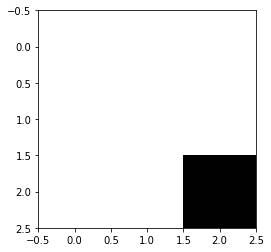

 31%|███       | 31/100 [00:10<00:20,  3.29it/s]

Exploring
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X | O | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
| O |   | O |
|-----------|
Winner is: O
O has won the game



Game: 32
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07  5.01262563e-07]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  1.25000008e-09 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


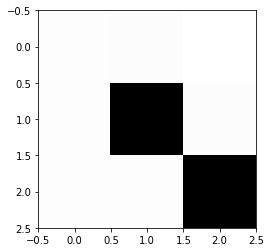

 32%|███▏      | 32/100 [00:10<00:17,  3.93it/s]

|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 33

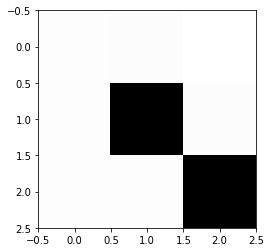

|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.01243687e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


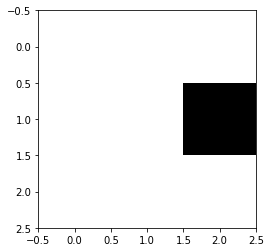

 33%|███▎      | 33/100 [00:10<00:17,  3.81it/s]

|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | O |
|-----------|
|   |   | X |
|-----------|
Winner is: O
O has won the game



Game: 34
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  1.25000008e-09 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


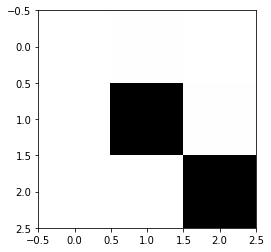

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


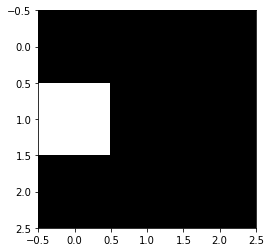

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


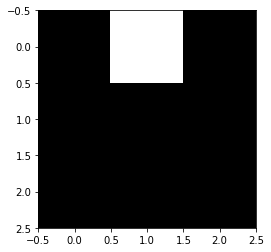

 34%|███▍      | 34/100 [00:11<00:21,  3.11it/s]

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Winner is: O
O has won the game



Game: 35
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  6.26578203e-07 -4.98750000e-05]]
AxesImage(54,36;334.8x217.44)


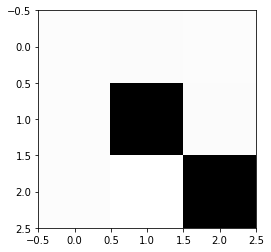

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.01262563e-07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


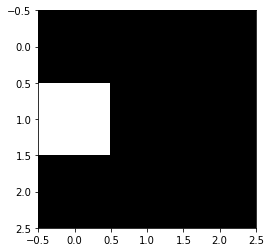

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 5.0125e-05 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


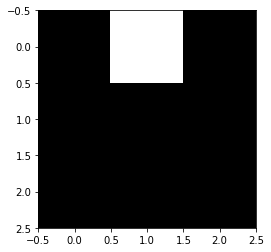

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[1.2500e-07 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


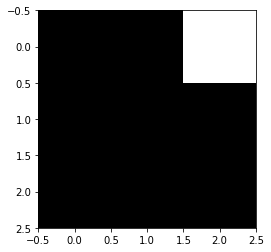

 35%|███▌      | 35/100 [00:11<00:24,  2.68it/s]

|-----------|
|   | X | O |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
Winner is: X
X has won the game



Game: 36
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.51125000e-04 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


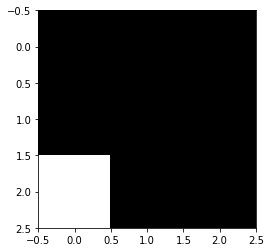

 36%|███▌      | 36/100 [00:11<00:20,  3.20it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 37
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.987500

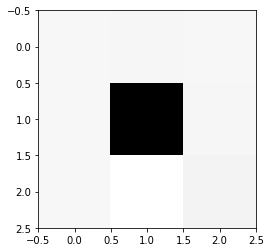

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(54,36;334.8x217.44)


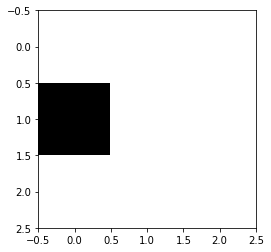

 37%|███▋      | 37/100 [00:12<00:19,  3.19it/s]

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   | O | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 38
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.987500

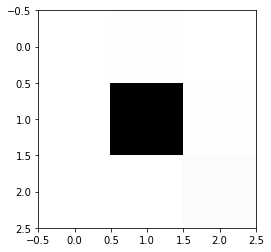

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  1.25000008e-09  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


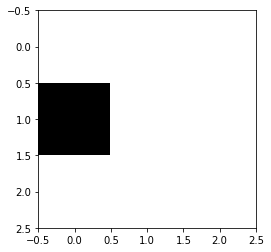

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


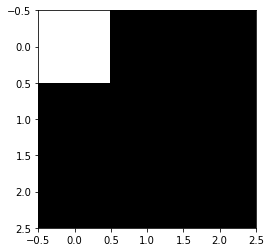

 38%|███▊      | 38/100 [00:12<00:21,  2.90it/s]

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   |   |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 39
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  5.01262563e-07 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


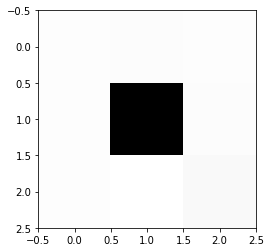

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98756219e-05  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


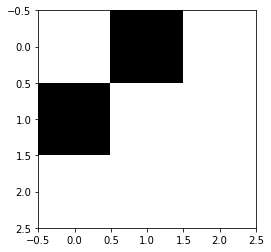

 39%|███▉      | 39/100 [00:12<00:20,  2.96it/s]

Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| O |   | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| O |   | X |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 40
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  1.27810183e-07 -8.18327417e-07]]
AxesImage(54,36;334.8x

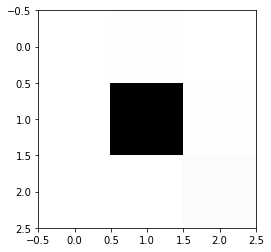

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98756219e-05  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


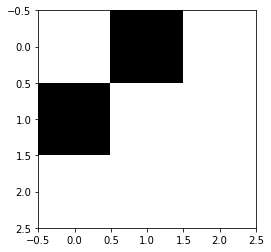

Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


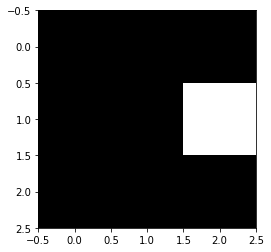

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


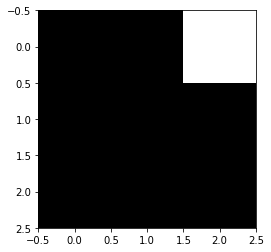

|-----------|
|   |   | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


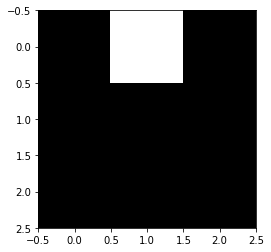

|-----------|
|   | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


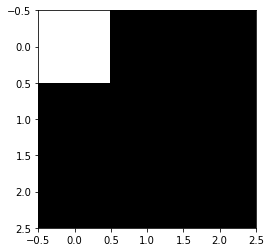

|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


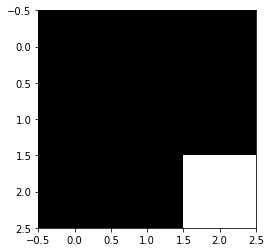

|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


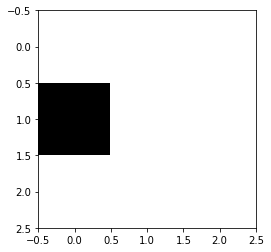

 40%|████      | 40/100 [00:14<00:32,  1.84it/s]

Exploring
|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 41
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  1.42923836e-07 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


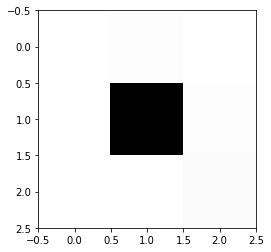

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98756219e-05  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


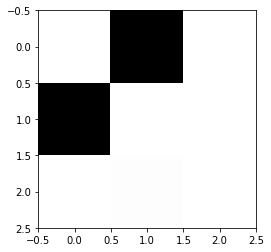

 41%|████      | 41/100 [00:14<00:26,  2.20it/s]

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   | O |
|-----------|
|   | X | O |
|-----------|
Winner is: O
O has won the game



Game: 42
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00  5.01250000e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


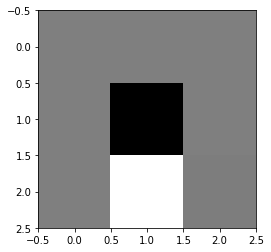

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98756219e-05  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  5.01250000e-05]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


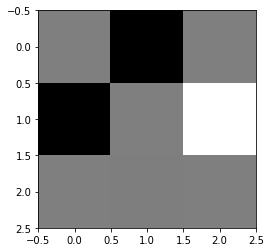

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


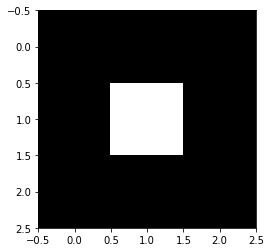

|-----------|
|   |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


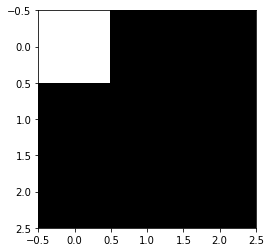

|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


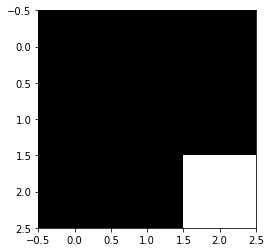

|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(54,36;334.8x217.44)


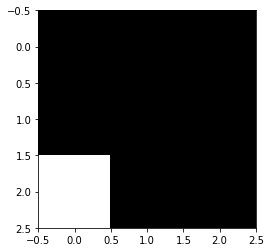

 42%|████▏     | 42/100 [00:15<00:31,  1.81it/s]

|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | O |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 43
Exploiting
State-Values
[[ 3.05229382e-71 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


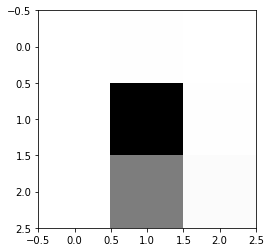

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
AxesImage(54,36;334.8x217.44)


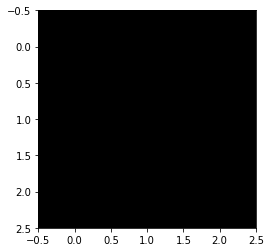

 43%|████▎     | 43/100 [00:15<00:26,  2.16it/s]

Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 44
Exploiting
State-Values
[[ 7.81250000e-19 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72

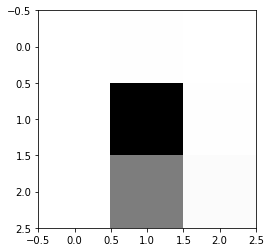

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[7.8125e-19 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


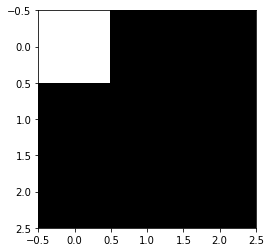

 44%|████▍     | 44/100 [00:15<00:22,  2.51it/s]

Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O |   | O |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 45
Exploiting
State-Values
[[ 1.27329766e-05 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x

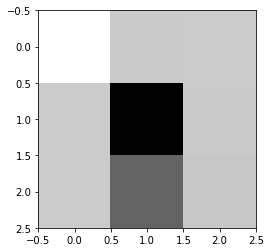

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


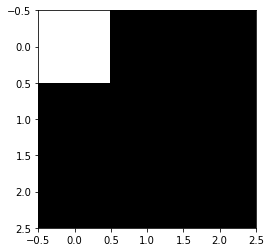

Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.81250000e-17 1.25000008e-09 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


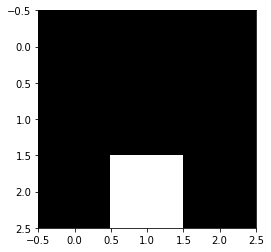

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


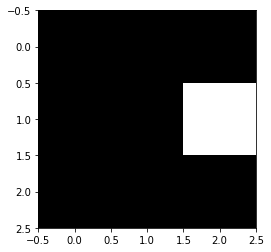

|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


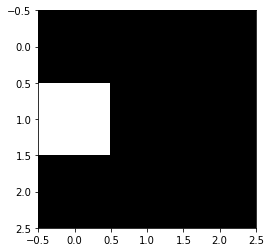

|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


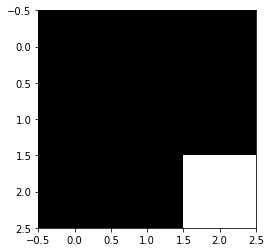

|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O |   | O |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
AxesImage(54,36;334.8x217.44)


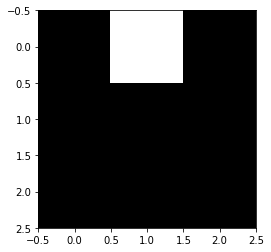

 45%|████▌     | 45/100 [00:16<00:28,  1.90it/s]

|-----------|
| X | X | X |
|-----------|
| O |   | O |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 46
Exploiting
State-Values
[[ 1.27480777e-05 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -2.55620366e-07]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


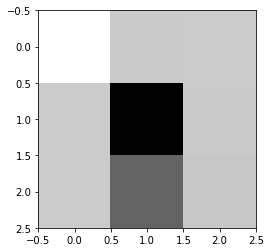

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


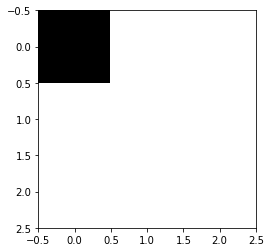

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 3.05229382e-69 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.65661520e-90]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


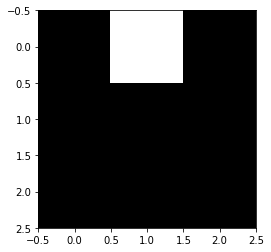

 46%|████▌     | 46/100 [00:16<00:26,  2.07it/s]

|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O | O | X |
|-----------|
|   |   | O |
|-----------|
Winner is: X
X has won the game



Game: 47
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.01262688e-09 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


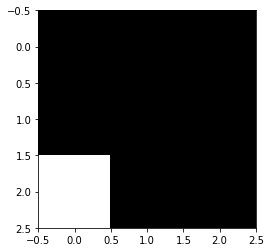

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  2.44387624e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


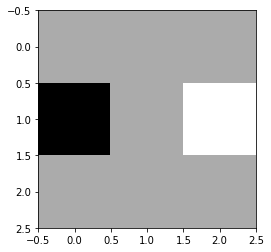

Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.01262563e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


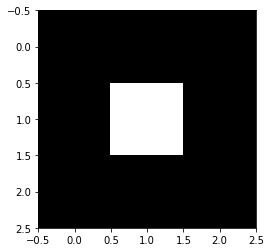

 47%|████▋     | 47/100 [00:17<00:22,  2.37it/s]

|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| O | O | X |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 48
Exploiting
State-Values
[[-3.65459476e-05 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05  1.32822810e-07]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


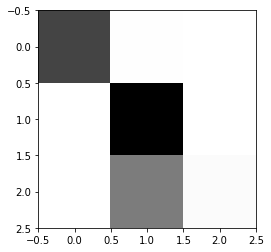

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.01262563e-07 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


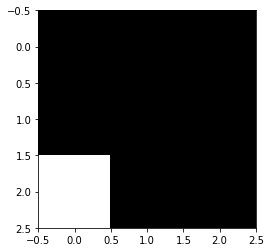

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  5.01262563e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


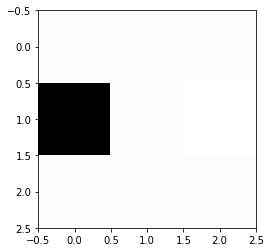

Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.0125e-05 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


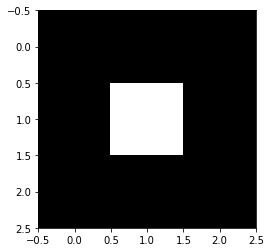

|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  5.0125e-05]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(54,36;334.8x217.44)


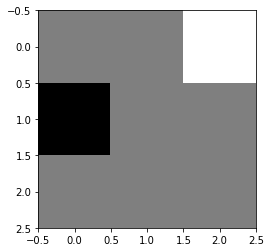

|-----------|
|   |   | X |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


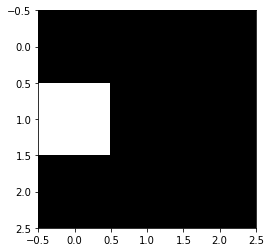

|-----------|
|   |   | X |
|-----------|
| O | O | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(54,36;334.8x217.44)


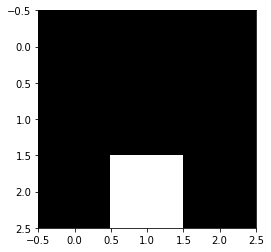

|-----------|
|   |   | X |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Exploiting
State-Values
[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


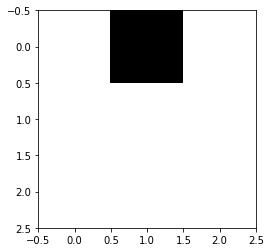

 48%|████▊     | 48/100 [00:17<00:29,  1.76it/s]

|-----------|
|   |   | X |
|-----------|
| O | O | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| O | O | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | O | X |
|-----------|
| O | X | O |
|-----------|
Winner is: O
O has won the game



Game: 49
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


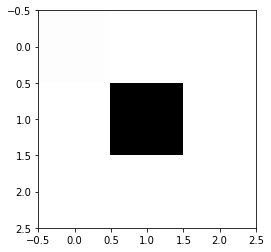

 49%|████▉     | 49/100 [00:18<00:21,  2.33it/s]

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
Winner is: X
X has won the game



Game: 50
Exploiting
State-Values
[[ 3.56993897e-08 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.987500

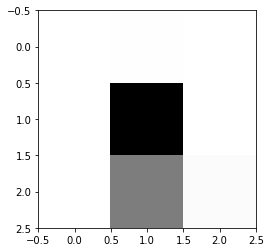

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


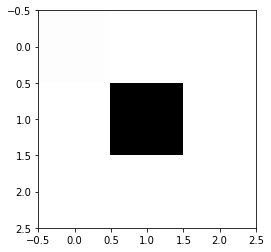

 50%|█████     | 50/100 [00:18<00:18,  2.76it/s]

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | X | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 51
Exploiting
State-Values
[[ 3.56993897e-08 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-0

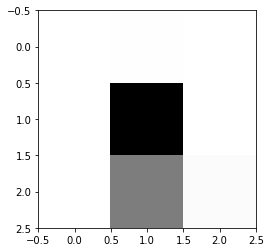

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


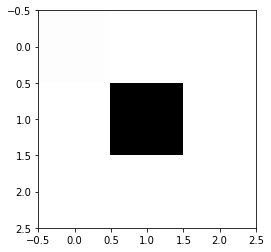

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


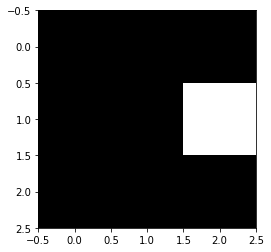

|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


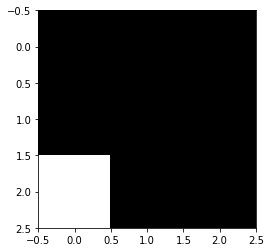

|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(54,36;334.8x217.44)


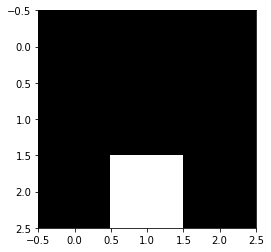

|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


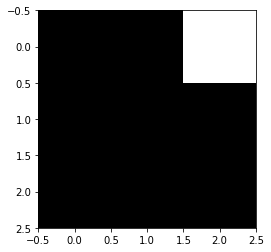

|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
| O | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


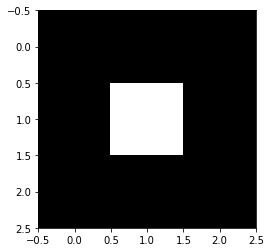

 51%|█████     | 51/100 [00:19<00:24,  1.99it/s]

|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 52
Exploiting
State-Values
[[ 3.56993897e-08 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -7.13987793e-08]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


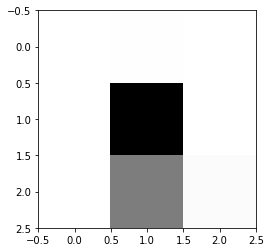

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


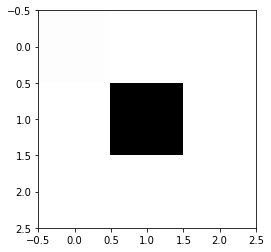

 52%|█████▏    | 52/100 [00:19<00:19,  2.43it/s]

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Winner is: X
X has won the game



Game: 53
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [ 2.63881776e-72 -4.98750000e-05 -7.13987793e-08]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


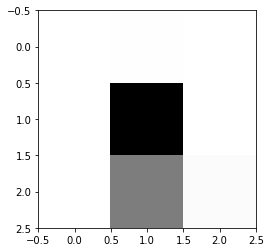

 53%|█████▎    | 53/100 [00:19<00:14,  3.13it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | X | X |
|-----------|
| O |   |   |
|-----------|
Winner is: X
X has won the game



Game: 54
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [ 5.01606994e-05 -4.98750000e-05 -7.13987793e-08]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


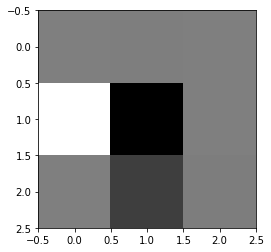

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.99975063e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.05175858e-49]
 [-4.98737562e-07  1.25000008e-09  7.89171746e-45]]
AxesImage(54,36;334.8x217.44)


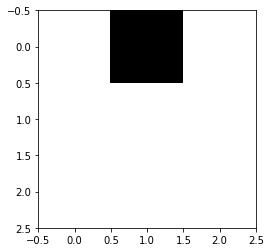

 54%|█████▍    | 54/100 [00:19<00:13,  3.46it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 55
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [ 5.01606994e-05 -4.98750000e-0

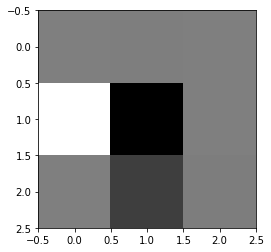

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.99975063e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.05175858e-49]
 [-4.98737562e-07  1.25000008e-09  7.89171746e-45]]
AxesImage(54,36;334.8x217.44)


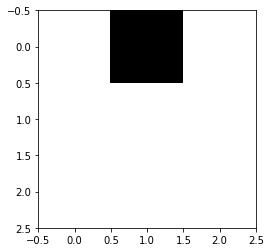

 55%|█████▌    | 55/100 [00:19<00:11,  3.77it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X | O |   |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X | O |   |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 56
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 0.00000000e+00 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


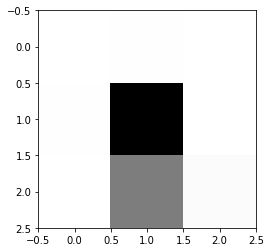

 56%|█████▌    | 56/100 [00:19<00:10,  4.31it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O | O | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Gam

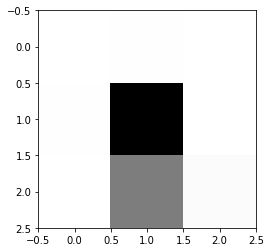

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


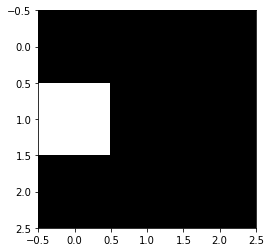

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


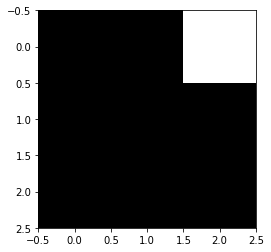

|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


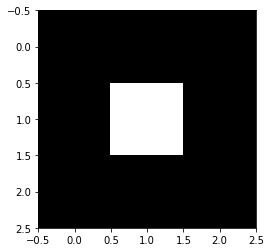

|-----------|
|   |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


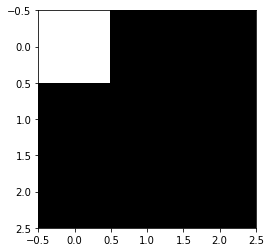

|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


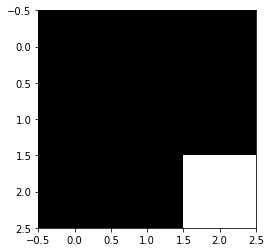

|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


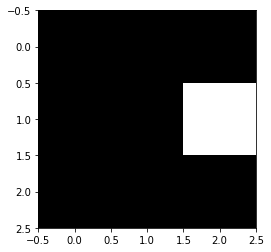

|-----------|
| X |   | X |
|-----------|
| O | O | X |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
AxesImage(54,36;334.8x217.44)


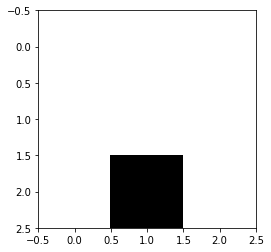

 57%|█████▋    | 57/100 [00:20<00:16,  2.58it/s]

|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 58
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 3.12500020e-10 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


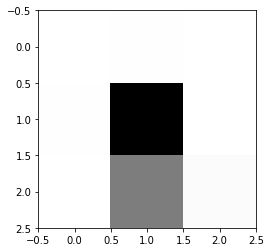

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


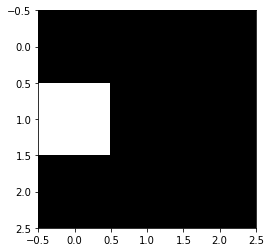

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


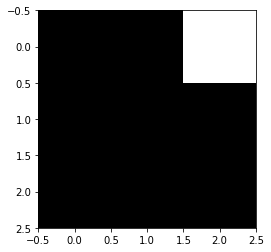

 58%|█████▊    | 58/100 [00:20<00:15,  2.77it/s]

|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| O |   |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| O | O |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| O | O |   |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 59
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 3.12500020e-10 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


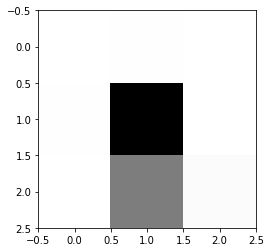

 59%|█████▉    | 59/100 [00:21<00:12,  3.37it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O | O | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Gam

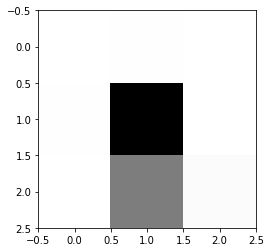

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


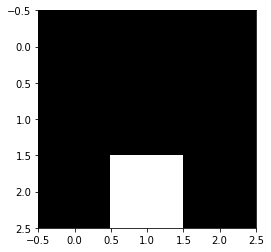

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


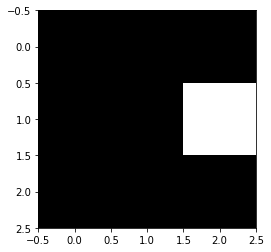

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]]
AxesImage(54,36;334.8x217.44)


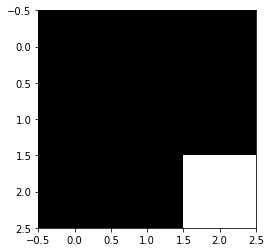

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


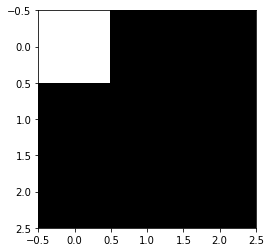

|-----------|
| X |   |   |
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


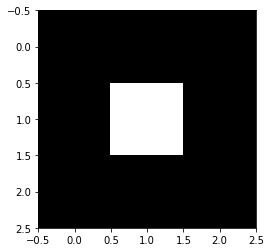

|-----------|
| X |   |   |
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


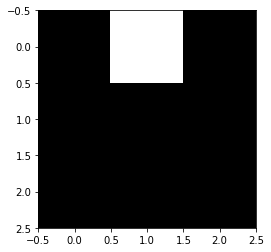

|-----------|
| X | X |   |
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


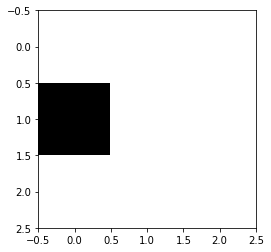

 60%|██████    | 60/100 [00:21<00:18,  2.20it/s]

Exploring
|-----------|
| X | X | X |
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 61
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 5.08130430e-08 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


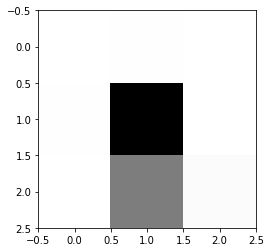

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


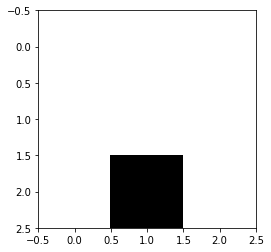

 61%|██████    | 61/100 [00:22<00:15,  2.60it/s]

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 62
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 1.26404680e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


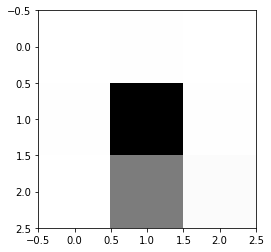

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  5.03743688e-05  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


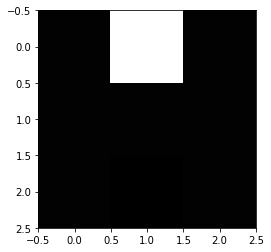

 62%|██████▏   | 62/100 [00:22<00:13,  2.86it/s]

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
|   |   | X |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 63
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [ 9.10426271e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


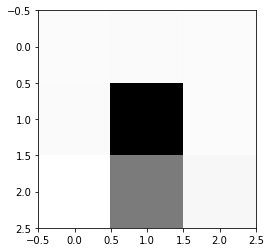

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  5.03743688e-05  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


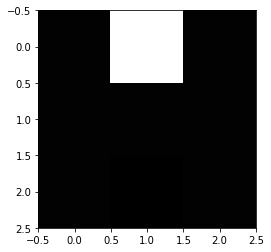

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2500e-07 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 5.0125e-05]]
AxesImage(54,36;334.8x217.44)


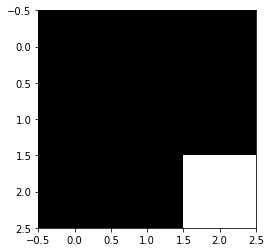

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(54,36;334.8x217.44)


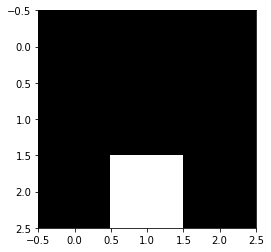

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


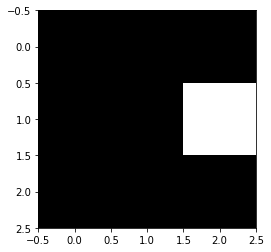

|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


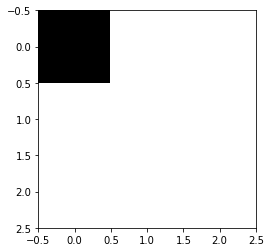

 63%|██████▎   | 63/100 [00:23<00:15,  2.38it/s]

|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 64
Exploiting
State-Values
[[-5.71916450e-19 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


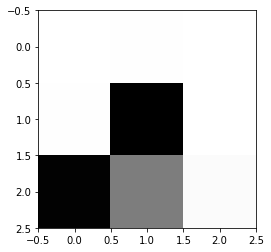

 64%|██████▍   | 64/100 [00:23<00:11,  3.04it/s]

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Gam

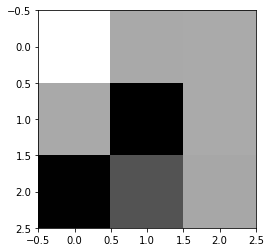

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-007  0.00000000e+000  0.00000000e+000]
 [ 2.87367692e-101 -4.98750000e-005  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  1.25000008e-009]]
AxesImage(54,36;334.8x217.44)


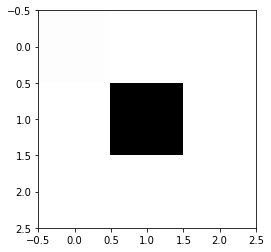

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 7.8125e-17 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


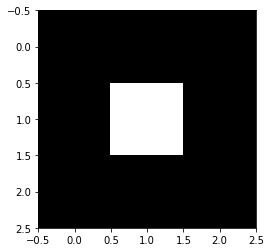

|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


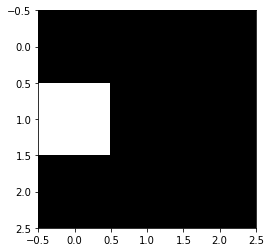

|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(54,36;334.8x217.44)


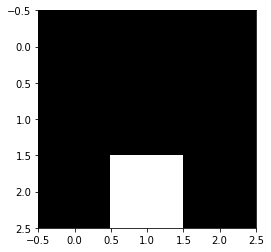

|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


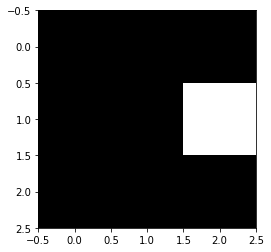

|-----------|
| X |   |   |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


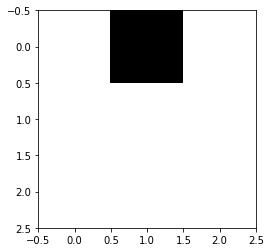

 65%|██████▌   | 65/100 [00:23<00:16,  2.10it/s]

Exploring
|-----------|
| X | X | X |
|-----------|
| O | X | O |
|-----------|
|   | X | O |
|-----------|
Winner is: X
X has won the game



Game: 66
Exploiting
State-Values
[[ 2.49526137e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


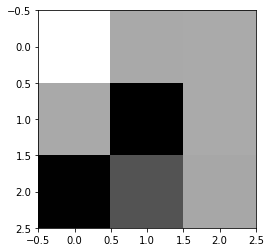

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-007  0.00000000e+000  0.00000000e+000]
 [ 2.87367692e-101 -4.98750000e-005  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000 -4.98737562e-007]]
AxesImage(54,36;334.8x217.44)


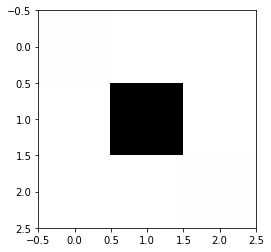

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000000e+00  1.5000000e-02  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.1438329e-16]
 [-5.7191645e-17  0.0000000e+00  0.0000000e+00]]
AxesImage(54,36;334.8x217.44)


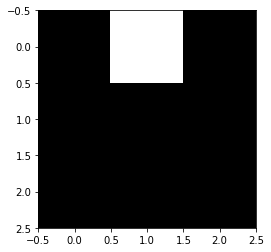

|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


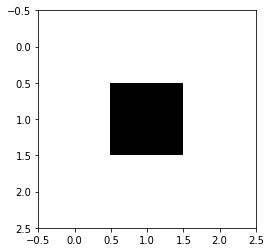

 66%|██████▌   | 66/100 [00:24<00:16,  2.04it/s]

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
Winner is: X
X has won the game



Game: 67
Exploiting
State-Values
[[ 1.25328141e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07 -4.98750000e-05 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


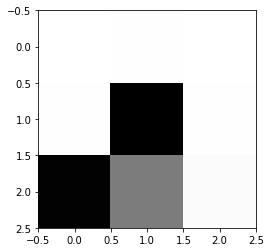

 67%|██████▋   | 67/100 [00:24<00:12,  2.60it/s]

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 68

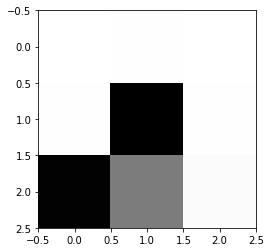

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


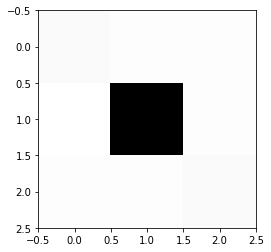

|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  1.25000008e-09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.14383290e-16]
 [-5.71916450e-17  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


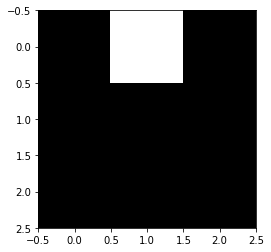

|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  5.0125e-05]
 [ 0.0000e+00 -1.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(54,36;334.8x217.44)


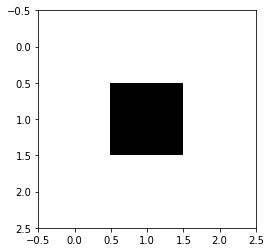

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


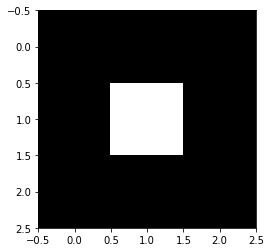

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


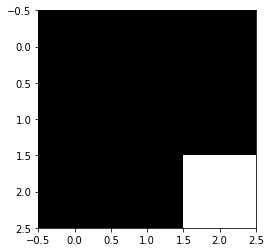

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


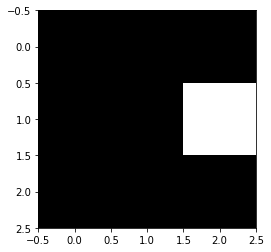

|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O |   | O |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
AxesImage(54,36;334.8x217.44)


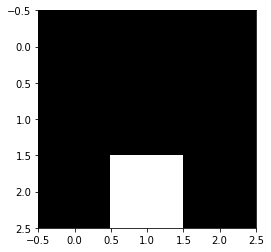

 68%|██████▊   | 68/100 [00:25<00:19,  1.61it/s]

|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | X | O |
|-----------|
Winner is: X
X has won the game



Game: 69
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-4.98750e-05  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  1.51125e-04]]
AxesImage(54,36;334.8x217.44)


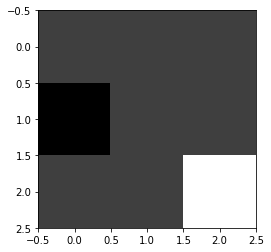

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.    -0.005  0.   ]]
AxesImage(54,36;334.8x217.44)


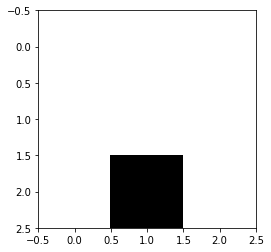

 69%|██████▉   | 69/100 [00:26<00:15,  2.03it/s]

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X |   |
|-----------|
| X |   | O |
|-----------|
Winner is: X
X has won the game



Game: 70
Exploiting
State-Values
[[ 2.47329181e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.75857918e-04 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


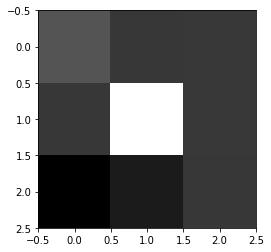

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


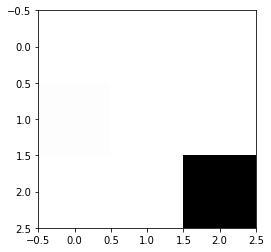

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
|   | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   | X | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game


 70%|███████   | 70/100 [00:26<00:12,  2.47it/s]




Game: 71
Exploiting
State-Values
[[ 2.47329181e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


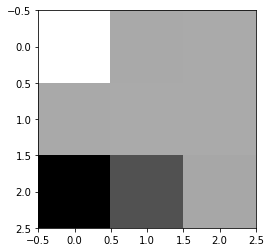

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  2.99065735e-69 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


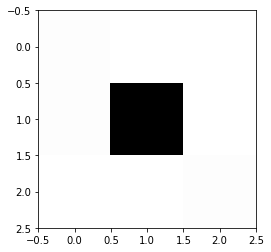

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18154965e-87 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


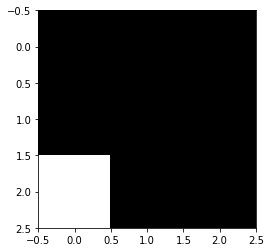

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 2.99065735e-67]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


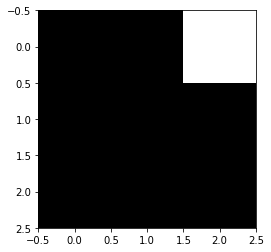

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 4.86117197e-43 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


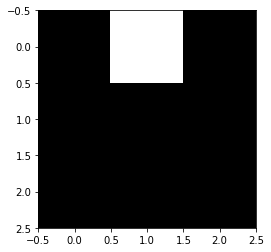

|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.73389598e-33 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


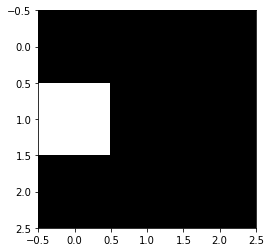

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.86019469e-21]]
AxesImage(54,36;334.8x217.44)


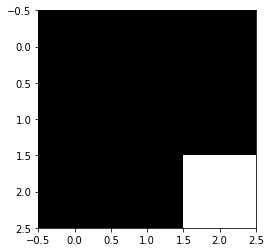

 71%|███████   | 71/100 [00:27<00:15,  1.84it/s]

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 72
Exploiting
State-Values
[[ 2.47329181e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


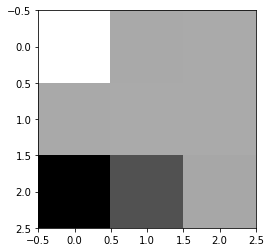

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  2.99065735e-69 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


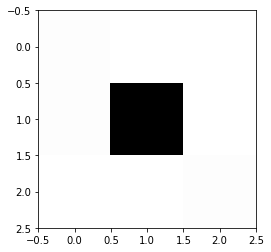

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18154965e-87 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


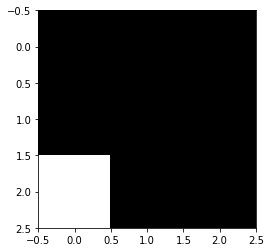

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 2.99065735e-67]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


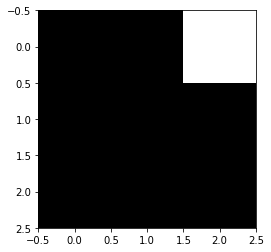

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 4.86117197e-43 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


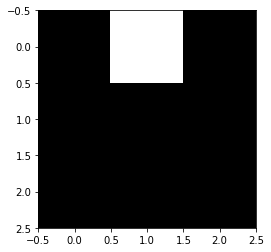

|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.73389598e-33 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


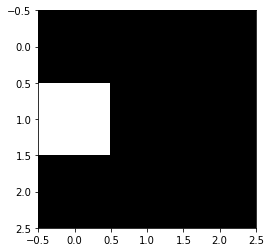

 72%|███████▏  | 72/100 [00:27<00:15,  1.76it/s]

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Draw
draw has won the game



Game: 73
Exploiting
State-Values
[[ 2.47329181e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


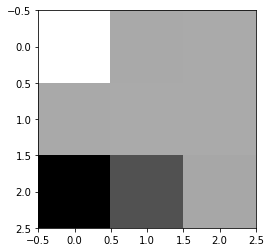

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  2.99065735e-69 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


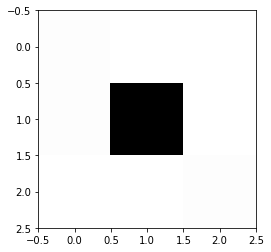

 73%|███████▎  | 73/100 [00:27<00:12,  2.13it/s]

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X | X | X |
|-----------|
|   | O | O |
|-----------|
Winner is: X
X has won the game



Game: 74
Exploiting
State-Values
[[ 2.47329181e-05 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


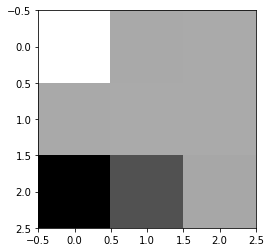

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  1.26878852e-25 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


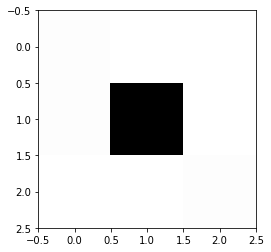

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.01250000e-05 0.00000000e+00]
 [2.47332271e-13 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


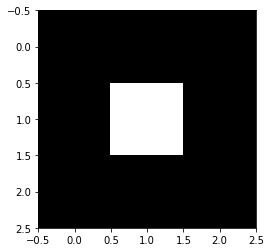

|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


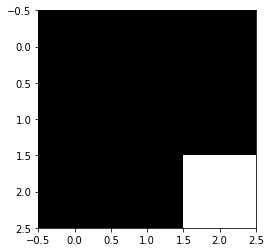

|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


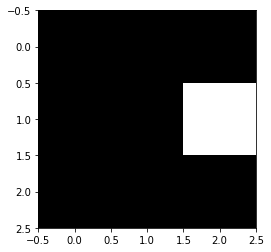

|-----------|
| X |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   | X | X |
|-----------|
|   | O | O |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
AxesImage(54,36;334.8x217.44)


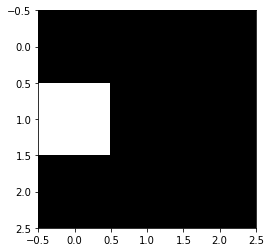

 74%|███████▍  | 74/100 [00:28<00:13,  1.96it/s]

|-----------|
| X | O |   |
|-----------|
| X | X | X |
|-----------|
|   | O | O |
|-----------|
Winner is: X
X has won the game



Game: 75
Exploiting
State-Values
[[ 1.49351450e-06 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


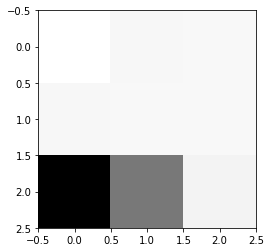

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.96256312e-05 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


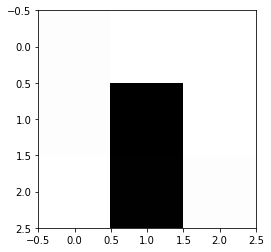

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.         0.         0.        ]
 [0.         0.00015112 0.        ]
 [0.         0.         0.        ]]
AxesImage(54,36;334.8x217.44)


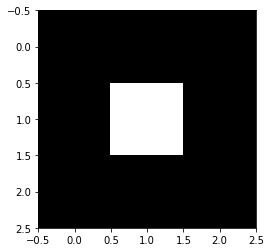

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.    -0.005]]
AxesImage(54,36;334.8x217.44)


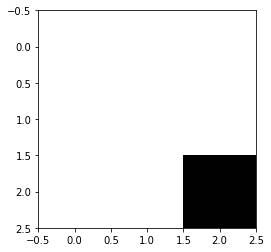

 75%|███████▌  | 75/100 [00:29<00:12,  2.01it/s]

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Draw
draw has won the game



Game: 76
Exploiting
State-Values
[[ 1.49351450e-06 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


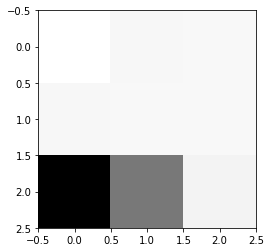

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.96256312e-05 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


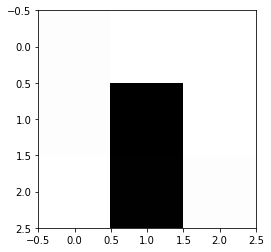

 76%|███████▌  | 76/100 [00:29<00:10,  2.34it/s]

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 77
Exploiting
State-Values
[[ 1.49351450e-06 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-0

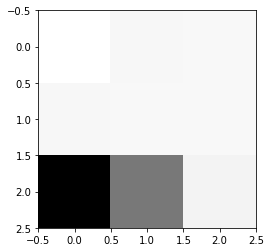

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.96256312e-05 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


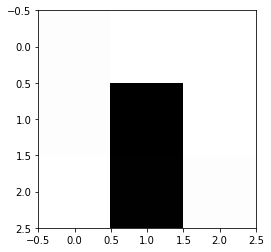

 77%|███████▋  | 77/100 [00:29<00:08,  2.56it/s]

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 78
Exploiting
State-Values
[[ 1.25315641e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


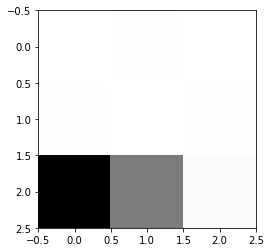

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  2.49681281e-07]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.96256312e-05 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


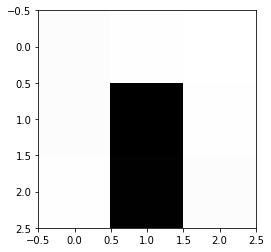

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 2.03026710e-41 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.28875825e-70]
 [0.00000000e+00 0.00000000e+00 1.25000000e-07]]
AxesImage(54,36;334.8x217.44)


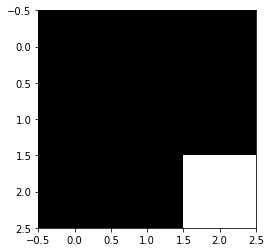

 78%|███████▊  | 78/100 [00:29<00:08,  2.62it/s]

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
|   | O | X |
|-----------|
Winner is: O
O has won the game



Game: 79
Exploiting
State-Values
[[ 9.10426271e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


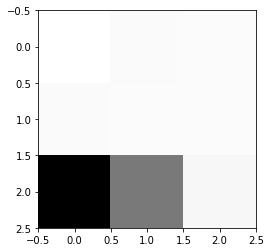

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  2.54387626e-05]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.96256312e-05 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


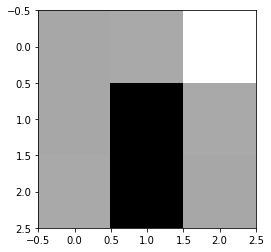

 79%|███████▉  | 79/100 [00:30<00:07,  2.81it/s]

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O |   |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| O | X |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 80
Exploiting
State-Values
[[ 9.10426271e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-0

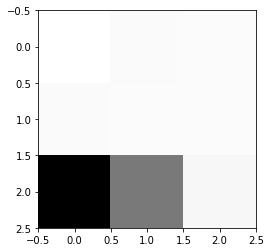

 80%|████████  | 80/100 [00:30<00:06,  3.02it/s]

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Gam

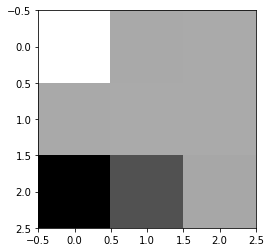

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  2.49368781e-07]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


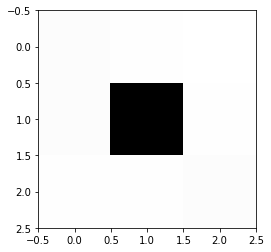

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 2.03026710e-41 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.28875825e-70]
 [8.27207737e-68 0.00000000e+00 5.01250000e-05]]
AxesImage(54,36;334.8x217.44)


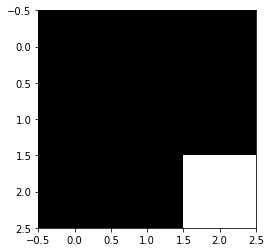

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.0125e-05 0.0000e+00]
 [1.2500e-07 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


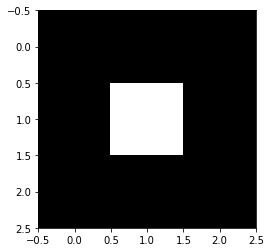

|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


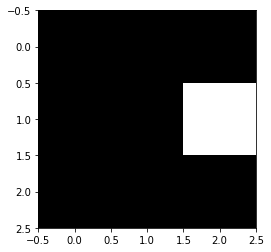

|-----------|
| X |   | O |
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


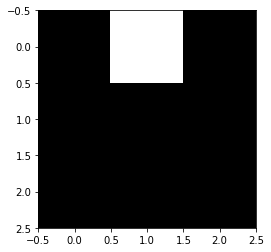

|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


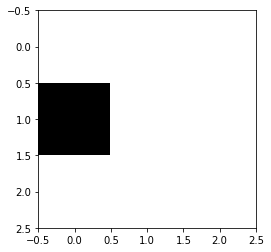

 81%|████████  | 81/100 [00:31<00:10,  1.85it/s]

Exploring
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 82
Exploiting
State-Values
[[ 4.04176334e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


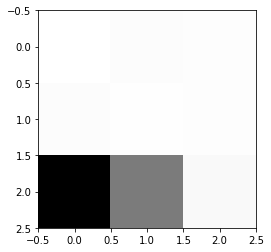

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.51136419e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


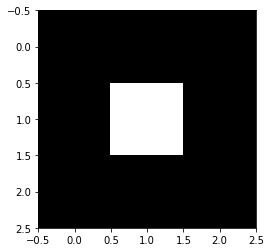

|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(54,36;334.8x217.44)


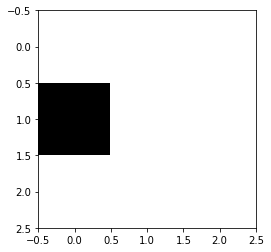

 82%|████████▏ | 82/100 [00:31<00:08,  2.01it/s]

|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | X | O |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | X | O |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X | X | O |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | X | O |
|-----------|
|   | O | O |
|-----------|
Winner is: O
O has won the game



Game: 83
Exploiting
State-Values
[[ 4.83412868e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


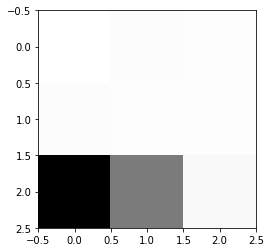

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  2.49425126e-05]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  5.01262563e-07]]
AxesImage(54,36;334.8x217.44)


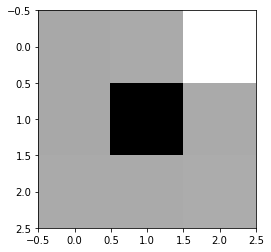

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  2.03026710e-41  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.28875825e-70]
 [ 8.27207737e-68  0.00000000e+00 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


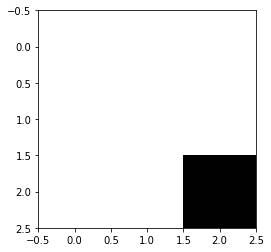

|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.000e+00 0.000e+00 0.000e+00]
 [3.125e-08 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
AxesImage(54,36;334.8x217.44)


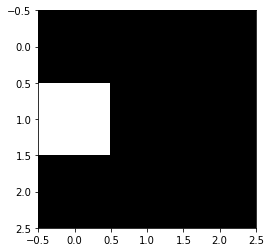

|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.0302671e-39 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(54,36;334.8x217.44)


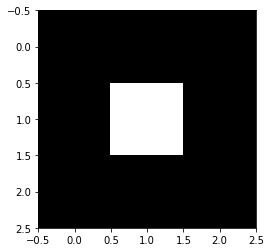

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.      0.      0.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.0025 -0.005 ]]
AxesImage(54,36;334.8x217.44)


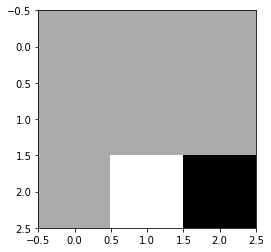

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.0302671e-37]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(54,36;334.8x217.44)


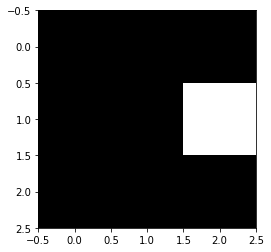

|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.10923945e-16]]
AxesImage(54,36;334.8x217.44)


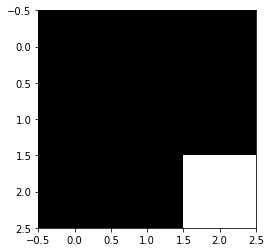

|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   | O | O |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.37223211e-18 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


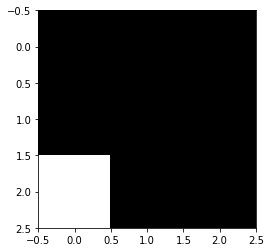

 83%|████████▎ | 83/100 [00:33<00:11,  1.45it/s]

|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Draw
draw has won the game



Game: 84
Exploiting
State-Values
[[ 4.83412868e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


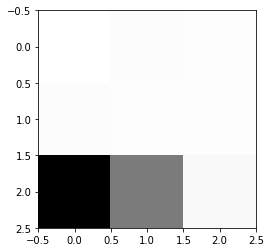

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


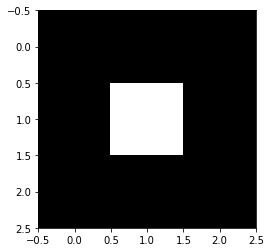

|-----------|
| X | O | X |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


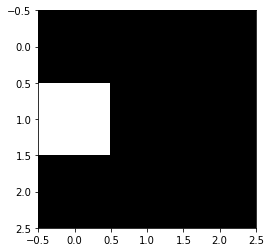

|-----------|
| X | O | X |
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


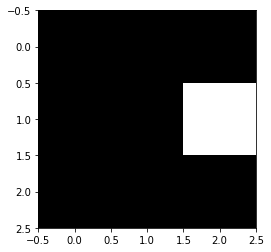

|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(54,36;334.8x217.44)


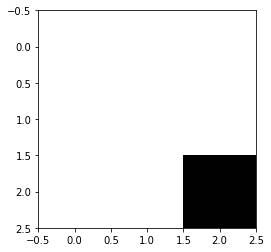

 84%|████████▍ | 84/100 [00:33<00:10,  1.53it/s]

Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
|   | O | X |
|-----------|
Winner is: X
X has won the game



Game: 85
Exploiting
State-Values
[[ 1.25315641e-07 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


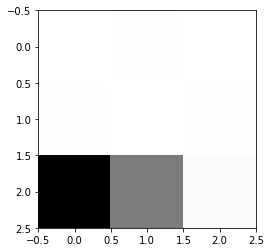

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  3.13641958e-18  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.28875825e-70]
 [ 8.27207737e-68  0.00000000e+00 -4.98737562e-07]]
AxesImage(54,36;334.8x217.44)


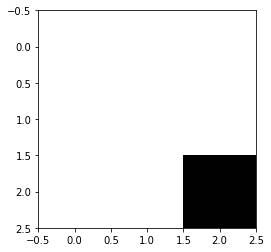

|-----------|
| X | X | O |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.13641958e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


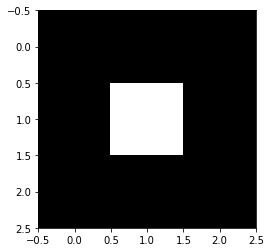

 85%|████████▌ | 85/100 [00:34<00:08,  1.72it/s]

|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
|   | X |   |
|-----------|
Winner is: X
X has won the game



Game: 86
Exploiting
State-Values
[[ 1.63667983e-06 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


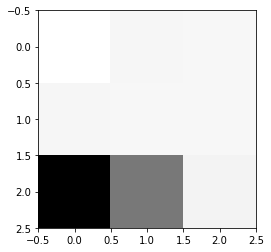

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  2.18750036e-09 -4.96256312e-05]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  5.01262563e-07]]
AxesImage(54,36;334.8x217.44)


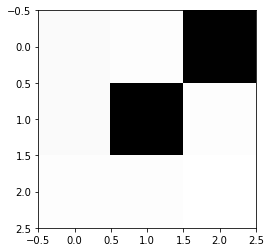

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.0125e-05 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


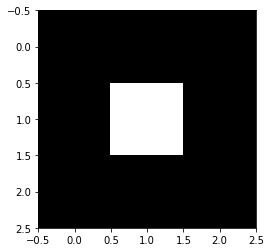

|-----------|
| X |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.00015112 0.        ]]
AxesImage(54,36;334.8x217.44)


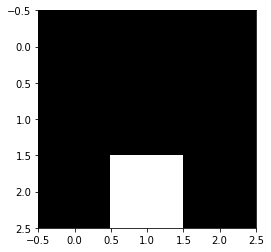

|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.42197061e-16 0.00000000e+00 0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


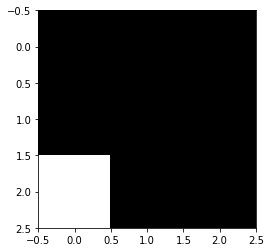

 86%|████████▌ | 86/100 [00:34<00:08,  1.62it/s]

|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 87
Exploiting
State-Values
[[ 1.63667983e-06 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


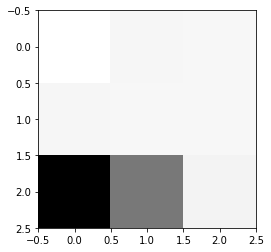

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  2.18750036e-09 -4.96256312e-05]
 [-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  5.01262563e-07]]
AxesImage(54,36;334.8x217.44)


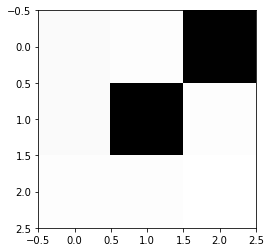

 87%|████████▋ | 87/100 [00:34<00:06,  2.02it/s]

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   | X | O |
|-----------|
| X |   | O |
|-----------|
Winner is: O
O has won the game



Game: 88
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  3.56993897e-08 -7.13987793e-08]
 [-4.94658363e-05 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


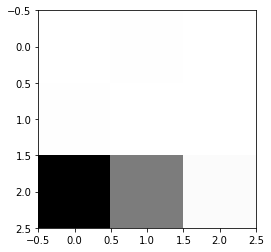

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09 -5.00000000e-03]]
AxesImage(54,36;334.8x217.44)


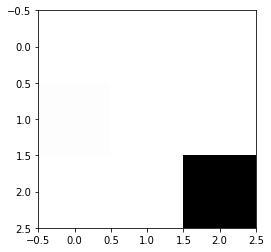

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


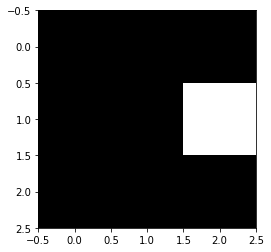

 88%|████████▊ | 88/100 [00:35<00:05,  2.19it/s]

|-----------|
|   |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 89
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  1.51374369e-04  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


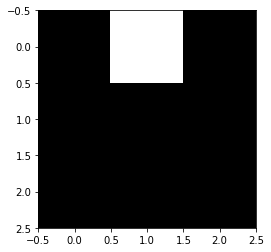

 89%|████████▉ | 89/100 [00:35<00:03,  2.78it/s]

|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Winner is: X
X has won the game



Game: 90
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  5.36961952e-07 -7.13987793e-08]
 [ 1.51133290e-04 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


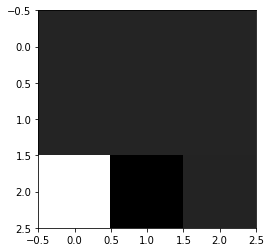

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -5.00000000e-03  0.00000000e+00]
 [-4.98743655e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


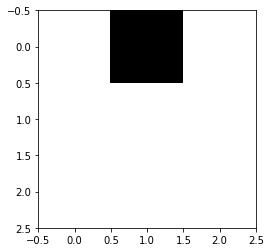

 90%|█████████ | 90/100 [00:35<00:03,  3.17it/s]

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | X | O |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
|   | X | O |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 91
Exploring
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


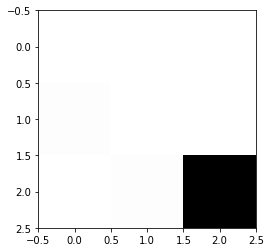

 91%|█████████ | 91/100 [00:35<00:02,  3.90it/s]

Exploring
|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | X | X |
|-----------|
| O | X |   |
|-----------|
Winner is: X
X has won the game



Game: 92
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.26565641e-07 -7.13987793e-08]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


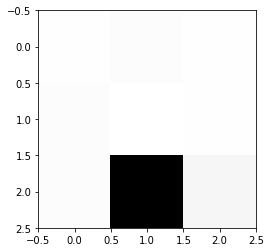

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  5.0125e-05  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


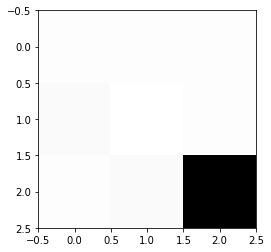

Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


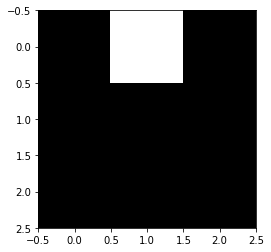

 92%|█████████▏| 92/100 [00:36<00:02,  2.67it/s]

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | X | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | X | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
Draw
draw has won the game



Game: 93
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.26565641e-0

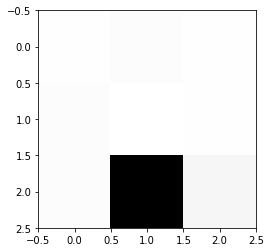

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  5.0125e-05  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


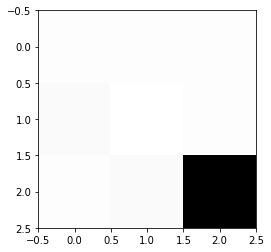

Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


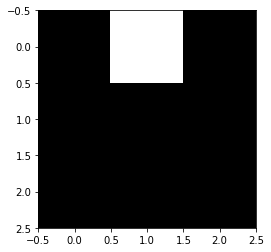

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(54,36;334.8x217.44)


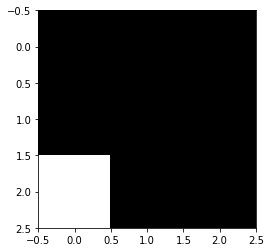

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


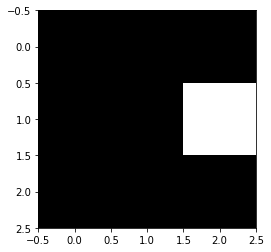

|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


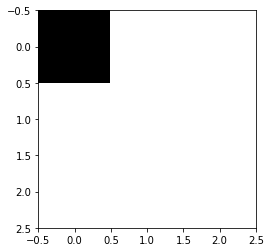

 93%|█████████▎| 93/100 [00:37<00:03,  2.18it/s]

Exploring
|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | X | X |
|-----------|
| O |   | X |
|-----------|
Winner is: X
X has won the game



Game: 94
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.25315641e-07 -7.13987793e-08]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


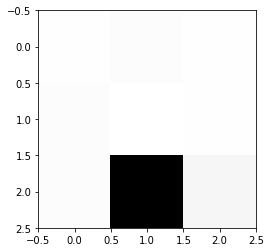

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  2.5000e-03  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


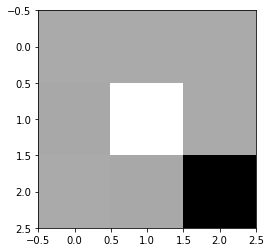

Exploiting
State-Values
[[0.0000000e+00 6.5027792e-74 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(54,36;334.8x217.44)


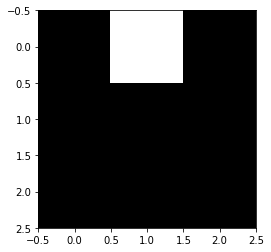

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.17512500e-03 0.00000000e+00 1.69303845e-52]]
AxesImage(54,36;334.8x217.44)


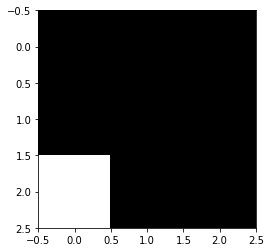

 94%|█████████▍| 94/100 [00:37<00:02,  2.16it/s]

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | X |   |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   | X | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
|   | X | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
|   | X | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | O | X |
|-----------|
Draw
draw has won the game



Game: 95
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.25315641e-07 -7.13987793e-08]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


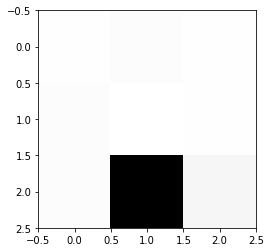

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  2.5000e-03  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


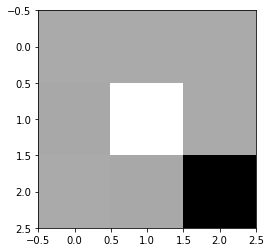

Exploiting
State-Values
[[0.0000000e+00 6.5027792e-74 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(54,36;334.8x217.44)


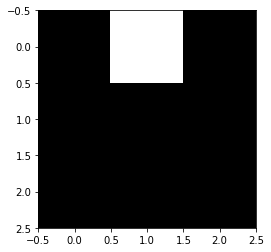

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.17512500e-03 0.00000000e+00 1.69303845e-52]]
AxesImage(54,36;334.8x217.44)


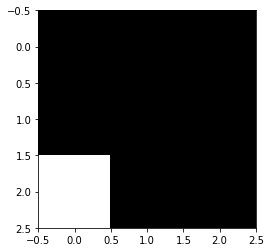

|-----------|
|   | X |   |
|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(54,36;334.8x217.44)


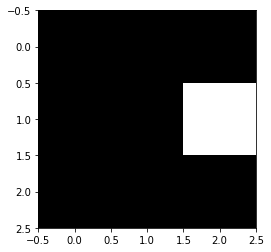

|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[-1.     0.     0.   ]
 [ 0.     0.495  0.   ]
 [ 0.     0.     0.   ]]
AxesImage(54,36;334.8x217.44)


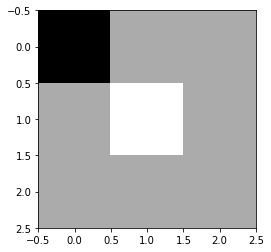

Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(54,36;334.8x217.44)


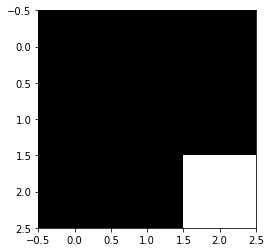

|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(54,36;334.8x217.44)


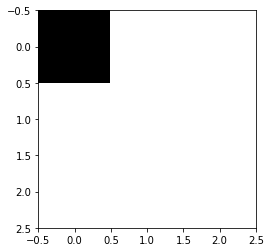

 95%|█████████▌| 95/100 [00:38<00:03,  1.60it/s]

Exploring
|-----------|
|   | X |   |
|-----------|
|   | X | X |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 96
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.17759679e-07 -7.13987793e-08]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


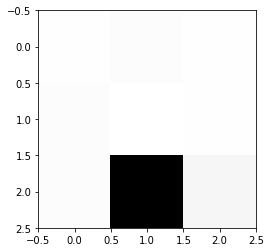

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98750000e-05  2.99065735e-71  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05 -5.00000000e-03]]
AxesImage(54,36;334.8x217.44)


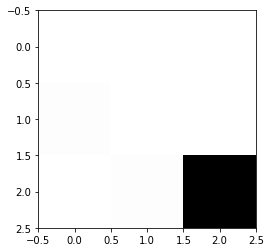

Exploiting
State-Values
[[ 0.00000000e+00 -7.55596452e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(54,36;334.8x217.44)


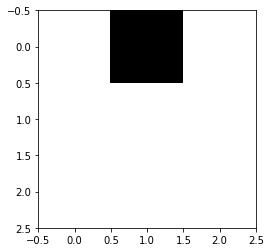

 96%|█████████▌| 96/100 [00:38<00:02,  1.79it/s]

|-----------|
|   |   |   |
|-----------|
| X | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X | X |
|-----------|
|   |   | O |
|-----------|
Winner is: X
X has won the game



Game: 97
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.00

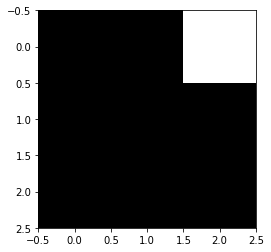

 97%|█████████▋| 97/100 [00:39<00:01,  2.22it/s]

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
Winner is: X
X has won the game



Game: 98
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.51250155e-04  1.26404680e-07]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


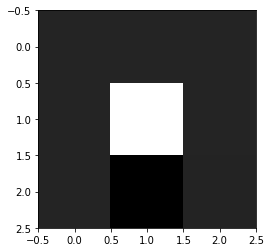

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05 -2.5000e-03  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05 -5.0000e-03]]
AxesImage(54,36;334.8x217.44)


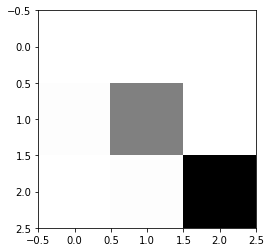

 98%|█████████▊| 98/100 [00:39<00:00,  2.54it/s]

|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   | X |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   | X | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
| O | X | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
| O | X | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 99
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  4.10413709e-07  1.26404680e-07]
 [-2.67230976e-07 -2.54659282e-05 -8.18327417e-07]]
AxesImage(54,36;334.8x217.44)


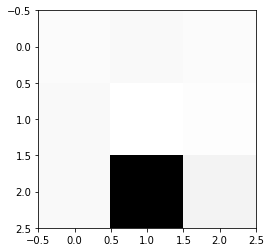

 99%|█████████▉| 99/100 [00:39<00:00,  3.17it/s]

|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | X | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
| O | O |   |
|-----------|
Winner is: O
O has won the game



Game: 100
Exploiting
State-Values
[[-1.78496948e-08 -2.50631281e-07 -6.25000039e-10]
 [-2.50309359e-07  1.56250

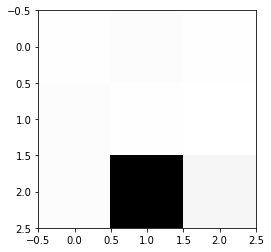

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51136534e-08 0.00000000e+00 5.01250000e-05]]
AxesImage(54,36;334.8x217.44)


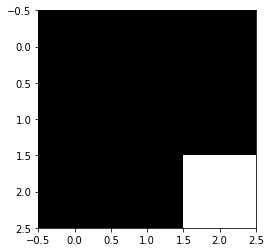

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(54,36;334.8x217.44)


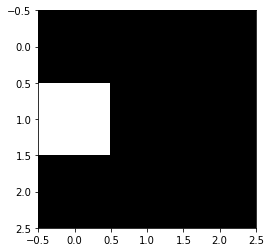

|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(54,36;334.8x217.44)


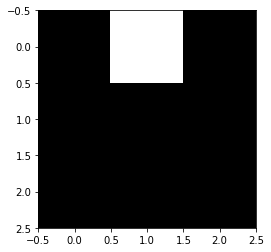

100%|██████████| 100/100 [00:40<00:00,  2.65it/s]

|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
Draw
draw has won the game


In [5]:
%time

AI1 = Agent()
AI2 = Agent()

games = 100
Winners = train(games, AI1, AI2)

# References :

1> https://medium.com/deep-math-machine-learning-ai/ch-12-reinforcement-learning-complete-guide-towardsagi-ceea325c5d53

2> https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ - David Silver RL

3> https://www.youtube.com/watch?v=TnUYcTuZJpM - Coldfusion

3> https://detailed.af/reinforcement/

4> https://www.geeksforgeeks.org/what-is-reinforcement-learning/

5> https://stackoverflow.com/

6> https://en.wikipedia.org/wiki/Tic-tac-toe

7> https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html
